<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Our-Approach" data-toc-modified-id="Our-Approach-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Our Approach</a></span></li><li><span><a href="#Data-Sources" data-toc-modified-id="Data-Sources-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Sources</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Methodology</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-provided" data-toc-modified-id="Data-provided-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data provided</a></span><ul class="toc-item"><li><span><a href="#Data-reading" data-toc-modified-id="Data-reading-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data reading</a></span></li><li><span><a href="#Data-cleaning:-tn_movie_budgets" data-toc-modified-id="Data-cleaning:-tn_movie_budgets-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data cleaning: tn_movie_budgets</a></span></li><li><span><a href="#Data-cleaning:-imdb_title_basics" data-toc-modified-id="Data-cleaning:-imdb_title_basics-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data cleaning: imdb_title_basics</a></span></li><li><span><a href="#Joining-the-two-dataframes" data-toc-modified-id="Joining-the-two-dataframes-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Joining the two dataframes</a></span></li></ul></li><li><span><a href="#Netflix-data" data-toc-modified-id="Netflix-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Netflix data</a></span><ul class="toc-item"><li><span><a href="#Web-scraping" data-toc-modified-id="Web-scraping-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Web scraping</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Data cleaning</a></span></li></ul></li><li><span><a href="#Video-Game-Movies-data" data-toc-modified-id="Video-Game-Movies-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Video Game Movies data</a></span></li></ul></li><li><span><a href="#Visualisations-and-Insights" data-toc-modified-id="Visualisations-and-Insights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualisations and Insights</a></span><ul class="toc-item"><li><span><a href="#Number-of-movies-released" data-toc-modified-id="Number-of-movies-released-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Number of movies released</a></span></li><li><span><a href="#Profit-and-Profit-Margin" data-toc-modified-id="Profit-and-Profit-Margin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Profit and Profit Margin</a></span></li><li><span><a href="#Impact-of-Budget" data-toc-modified-id="Impact-of-Budget-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Impact of Budget</a></span></li><li><span><a href="#Runtime" data-toc-modified-id="Runtime-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Runtime</a></span></li><li><span><a href="#Genre" data-toc-modified-id="Genre-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Genre</a></span></li><li><span><a href="#Release-date" data-toc-modified-id="Release-date-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Release date</a></span><ul class="toc-item"><li><span><a href="#Release-month" data-toc-modified-id="Release-month-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Release month</a></span></li><li><span><a href="#Release-day" data-toc-modified-id="Release-day-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Release day</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Case-study:-Netflix-Original-Films" data-toc-modified-id="Case-study:-Netflix-Original-Films-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Case study: Netflix Original Films</a></span></li><li><span><a href="#Case-study:-Movies-based-on-Video-Games" data-toc-modified-id="Case-study:-Movies-based-on-Video-Games-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Case study: Movies based on Video Games</a></span></li></ul></li><li><span><a href="#Conclusion-and-Future-Work" data-toc-modified-id="Conclusion-and-Future-Work-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion and Future Work</a></span><ul class="toc-item"><li><span><a href="#Summary-of-Findings" data-toc-modified-id="Summary-of-Findings-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Summary of Findings</a></span></li><li><span><a href="#Actionable-Insights" data-toc-modified-id="Actionable-Insights-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Actionable Insights</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Future Work</a></span></li></ul></li></ul></div>

<b>Final Project Submission</b>

Please fill out:
* Student name: Nadine Amersi-Belton
* Student pace: part time
* Scheduled project review date/time: 20/03/2020 at 3pm GMT
* Instructor name: Victor Geislinger
* Blog post URL: TBC


# Introduction

## Problem Statement

In January 2020, Microsoft Inc. ("the Company") decides to enter the movie industry and creates a movie studio. The company approaches consultancy XYZ to provide a data-driven understanding of the industry and characteristics of a successful movie.

The Company is after actionable insights to shape their new venture.

## Our Approach

We will first seek to provide an insight into the movie industry by examining:
- The number of movies produced
- How profitable are movies

We will then explore the characteristics of a successful movie and seek to answer the following questions:
- What budget should be allocated? 
- What movie genres are currently performing best? 
- How long should the movie be? 
- When should the movie be released? 

We will draw our attention to two particular scenarios:
- Online distribution of movies, examining Netflix original movies
- Movies based on video games, as the Company has successful existing franchises

## Data Sources

Data for this project was obtained from the following <a href="https://github.com/learn-co-students/dsc-mod-1-project-v2-1-onl01-dtsc-pt-012120/tree/master/zippedData">repo</a> and also saved in ZippedData folder in this repository.

The data comes from:
- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB.org
- The-numbers

In addition, we will scrape data from Wikipedia pertaining Netflix original films and movies based on existing video game franchises.

## Methodology

The process can be divided into two main parts.

Section 2 focuses on data preparation. 
<br> The steps include: 
- Importing libraries
- Reading and cleaning provided data
- Dealing with missing values
- Joining datasets
- Scraping additional data and cleaning it

Section 3 focuses on visualisations and insights. 
<br>For each characteristic we will be:
- Conducting feature engineering where applicable
- Creating visualisations
- Drawing conclusions
- Providing recommendations

Finally section 4 sets out a summary of our findings and suggested future work.

# Data Preparation

In [1]:
# Import the necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from glob import glob
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud

sns.set_style("ticks")

%matplotlib inline

## Data provided

### Data reading

The data provided is in the zippedData folder. There are a number of .csv and .tsv files. To easily read them all together we make use of glob.

In [2]:
# Create a list of all csv files using glob
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

We will create a dictionary of DataFrames with key the name of the file and value a Pandas DataFrame. This will allow us to then preview all the data by iterrating over the dictionary.

In [3]:
# Create a dictionary of DataFrames
csv_dict = {}
for file in csv_files:
    filename = file.split('zippedData/')[-1].replace(".csv.gz", "").replace(".", "_") # Clean filename
    file_df = pd.read_csv(file) # Create DataFrame
    csv_dict[filename] = file_df # Insert DataFrame into dictionary

In [4]:
# Preview the data
for name, df in csv_dict.items():
    print(name)
    display(df.head()) # Using display instead of print leads to neater formatting in Jupyter Notebook
    print("------------------ \n")

imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


------------------ 

tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


------------------ 

imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


------------------ 

imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


------------------ 

imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


------------------ 

imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


------------------ 

tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


------------------ 

bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


------------------ 

imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


------------------ 



We then repeat this process for the .tsv files.

In [5]:
# Create a list of all tsv files using glob
tsv_files = glob("./zippedData/*.tsv.gz")
tsv_files

['./zippedData/rt.reviews.tsv.gz', './zippedData/rt.movie_info.tsv.gz']

In [6]:
# Create a dictionary of DataFrames
tsv_dict = {}
for file in tsv_files:
    filename = file.split('zippedData/')[-1].replace(".tsv.gz", "").replace(".", "_") # Clean filename
    file_df = pd.read_table(file, delimiter = '\t', encoding = 'latin-1') # Create DataFrame
    tsv_dict[filename] = file_df # Insert dataframe into dictionary 

In [7]:
# Preview the data
for name, df in tsv_dict.items():
    print(name)
    display(df.head()) # Using display instead of print leads to neater formatting in Jupyter Notebook
    print("------------------ \n")

rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


------------------ 

rt_movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


------------------ 



<b> Summary </b>

We have a number of DataFrames and the first step is to consider which ones will best answer our questions and should be the focus of our analysis. Due to time constraints, it is unlikely that we wil be able to clean all DataFrame and investigate all features.

The first DataFrame which stands out is `tn_movie_budgets`. This table shows the production budget, domestic and worldwide gross. This financial information will be valuable in exploring the meaning of profit. It will also allow us to distinguish which films perfomed best in the box office as we will be able to focus some of our analysis on the top 100 grossing movies.

In [8]:
# tn_movie_budgets 
tnmb = csv_dict['tn_movie_budgets']
tnmb.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


The second DataFrame which we will investigate is `imdb_title_basics`. This table provides us with key features, namely the genre(s) of the movie and its runtime.

In [9]:
# imdb_title_basics
imdb = csv_dict['imdb_title_basics']
imdb.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


We note that the `bom_movie_gross` DataFrame also provides details of revenue (domestic and foreign gross) but does not feature the production budget. To strengthen the reliability of the figures, it would be worthwhile comparing the figures with those in `tn_movie_budgets`.However this is outside the scope of this preliminary analysis.

Whilst `rt_movie_info` also provides details of genre and runtime, we have chosed to use the `imdb` data on the basic that we can more easily access further attributes and match them using imdb's unique `tconst` identifyer. Again to strengthen the reliability of the data, it would be worthwhile to compare the two. However again this is outside the scope of this preliminary analysis.

### Data cleaning: tn_movie_budgets

In this section we will manipulate the `tn_movie_budgets` DataFrame to ensure it is ready to for visualisations and insights. We will call it `tnmb` for simplicity.

In [10]:
# Set tn_movie_budgets DataFrame as tnmb
tnmb = csv_dict['tn_movie_budgets']
tnmb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
# Get Summary
tnmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the summary above, we note that we have 5,782 rows with data. We will first need to check for duplicates. We note that the `release_date` entries will need to be changed to DateTime object and the `production_budget`, `domestic_gross` and `worldwide_gross` entries will need to be changed from to reflect that they are numeric. As all columns have 5,782 entries there does not appear to be any missing values. However we will check this by viewing the summary statistics.

In [12]:
# See if any duplicates
tnmb.duplicated().any()

False

There are no identical rows.

The `id` column does not add anything and there are no other datasets from the-numbers that we will look to join. As such we can remove it.

In [13]:
# Remove id column
tnmb = tnmb.drop('id', axis = 1)
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


We will convert the `release_date` entries to be of type DateTime so we can easily extract the year. When looking at when to release a movie we will further extract the month and day.

In [14]:
# Convert release_date to a datetime object
tnmb['release_date'] = pd.to_datetime(tnmb['release_date'])

In [15]:
# Create year column 
tnmb['release_year'] = pd.DatetimeIndex(tnmb['release_date']).year

We note that the `production budget`, `domestic_gross` and `worldwide_gross` entries all require the same type of "cleaning", namely to remove the \$ symbol, the comma seperator and convert to integer. As such it is useful to define a function to make these changes and then use our function on the three columns.

In [16]:
# Define function to clean numbers
def numclean(df,col):
    '''
    param1 = Pandas DataFrame
    param2 = Column
    Removes $ symbol, removes ',' seperator and changes to int type
    Returns DataFrame
    '''
    df[col]=df[col].str.replace("$","").str.replace(",","").astype('int')
    return df

In [17]:
# Run function on the three columns
numclean(tnmb,'production_budget')
numclean(tnmb,'domestic_gross')
numclean(tnmb,'worldwide_gross')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
5777,2018-12-31,Red 11,7000,0,0,2018
5778,1999-04-02,Following,6000,48482,240495,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,2015-09-29,A Plague So Pleasant,1400,0,0,2015


We will use the `describe.()` method to obtain summary statistics and better understand our data as well as check for anomalies.

In [18]:
tnmb.describe()

,production_budget,domestic_gross,worldwide_gross,release_year
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139
std,4.181208e+07,6.824060e+07,1.747200e+08,12.724386
min,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000
50%,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000
75%,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000
max,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000


From the above, we note that there are entries where the worldwide gross is zero. It is worth investigating this further. We also note that the movies span the years 1915 to 2020.

In [19]:
# Investigate rows where worldwide_gross is 0
tnmb[tnmb['worldwide_gross'] == 0]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,2020-12-31,Moonfall,150000000,0,0,2020
479,2017-12-13,Bright,90000000,0,0,2017
480,2019-12-31,Army of the Dead,90000000,0,0,2019
535,2020-02-21,Call of the Wild,82000000,0,0,2020
670,2019-08-30,PLAYMOBIL,75000000,0,0,2019
...,...,...,...,...,...,...
5761,2014-12-31,Stories of Our Lives,15000,0,0,2014
5764,2007-12-31,Tin Can Man,12000,0,0,2007
5771,2015-05-19,Family Motocross,10000,0,0,2015
5777,2018-12-31,Red 11,7000,0,0,2018


In [20]:
# Get number of rows where worldwide_gross is 0
len(tnmb[tnmb['worldwide_gross'] == 0])

367

For some movies, we note the release_date is in the future and as such it is normal that the worldwide gross is unavailable. For others we could investigate futher by researching the titles. However as the number of such entries is small compare to the whole dataset, we have chosen to remove these rows.

In [21]:
# Keep only rows where worldwide_gross is non-zero
tnmb = tnmb[tnmb['worldwide_gross'] != 0]

In [22]:
# Reset index
tnmb = tnmb.reset_index(drop = True)

In [23]:
# View first 5 rows
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


This DataFrame is ready.

### Data cleaning: imdb_title_basics

In [24]:
# Set imdb_title_basics as imdb
imdb = csv_dict['imdb_title_basics']
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [25]:
# Get Summary
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


From the summary we note that this is a large dataset, with 146144 entries. The data types appear correct, with `runtime_minutes` being a float and `start_year` an integer. There are missing values in the `original_title`, `runtime_minutes` and `genres` columns, which we will investigate and handle. We will also check for duplicates.

In [26]:
# Get number of missing values per column
imdb.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [27]:
# % of missing values for runtime
(imdb['runtime_minutes'].isna().sum()/len(imdb)*100).round(2)

21.72

This is a significant proportion of our dataset and as such we cannot simply discard these rows. We will need to fill the missing values with a suitable figure.

In [28]:
# Consider mean
imdb['runtime_minutes'].mean().round(2)

86.19

In [29]:
# Consider median
imdb['runtime_minutes'].median().round(2)

87.0

The median of 87 minutes is a better option as it is less sensitive to outliers than the mean. We note that both figures are similar though. We will elect to fill missing values with the median.

In [30]:
# Fill missing values with median
imdb['runtime_minutes'] = imdb['runtime_minutes'].fillna(imdb['runtime_minutes'].median())

In [31]:
# % of missing values for genre
(imdb['genres'].isna().sum()/len(imdb)*100).round(2)

3.7

In [32]:
# % of missing values for original_title
(imdb['original_title'].isna().sum()/len(imdb)*100).round(2)

0.01

For both genre and original titles, the missing values are a much smaller proportion of our dataset and as such we will choose to drop the rows with missing data.

In [33]:
# Drop rows that contain null values
imdb = imdb.dropna()

In [34]:
# Check for duplicates
imdb.duplicated().any()

False

We will use the `describe.()` method to obtain summary statistics and better understand our data as well as check for anomalies.

In [35]:
# Get summary statistics
imdb.describe()

,start_year,runtime_minutes
count,140734.000000,140734.000000
mean,2014.613945,86.411109
std,2.735566,149.934410
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,87.000000
75%,2017.000000,95.000000
max,2115.000000,51420.000000


We note that the `start_year` spans 2010 to 2115! It might be interesting to investigate future movies separately so we will create a DataFrame futuremovies taking all entries with `start_year` post 2020.

In [36]:
futuremovies = imdb[imdb['start_year'] >= 2020]
futuremovies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,87.0,"Action,Adventure,Fantasy"
93,tt0427340,Masters of the Universe,Masters of the Universe,2021,87.0,"Action,Adventure,Drama"
229,tt0499097,Without Remorse,Without Remorse,2020,87.0,"Action,Crime,Drama"
289,tt0805647,The Witches,The Witches,2020,87.0,"Adventure,Comedy,Family"
386,tt0870154,Jungle Cruise,Jungle Cruise,2020,87.0,Adventure


As year 2115 is quite a few years away, let us look closer at movies predicted to be released post 2030 as it may be that the data are erroneous and need correcting.

In [37]:
imdb[imdb['start_year'] >= 2030]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,87.0,Drama


Looking up that title on imdb's website shows indeed the existence of a film sealed in a time capsule to be released in 2115. We shall keep it in our dataset.

For `runtime_minutes`, we note that the shortest movie in our dataset is merely a minute long and the longuest is 51420 minutes long (857 hours!). We will explore this further in our section on runtime.

Let us rename the `primary_title` column to `movie` to match the `tnmb` DataFrame. We can also drop the `original_title` column as it is not needed.

In [38]:
# Rename primary title to movie
imdb = imdb.rename(columns = {'primary_title':'movie'})
# Drop original title column
imdb = imdb.drop('original_title', axis = 1)

In [39]:
imdb.head()

,tconst,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


This DataFrame is ready

### Joining the two dataframes

Whilst we could obtain insights from our `tnmb` and `imdb` DataFrames seperately, joining them is required to relate genre and runtime to the success of a movie (namely gross revenue and/or profit.) Careful attention is needed so as to preserve as much data as possible and not introduce discrepancies.

Let us remind ourselves of the size of our DataFrames so we can be aware of the loss of data.

In [40]:
# Number of rows for tnmb and imdb DataFrames
display(len(tnmb), len(imdb))

5415

140734

We are considering joining the DataFrames based on the name of the movie. However the name is unlikely to be unique due to the existance of remakes. Let us investigate movies with the same name in both `tnmb` and `imdb` DataFrames.

In [41]:
# Number of movies with same name in tnmb
len(tnmb[tnmb.duplicated('movie')])

76

In [42]:
# Number of movies with same name in imdb
len(imdb[imdb.duplicated('movie')])

9400

To avoid incorrectly matching an original movie with a remake (and the runtime for instance being wrong), we will elect to keep only the latest movie and drop any previous movies with the same name. The remake is more interesting to us as the financial information will more accurately represent current market costs and revenue.

In [43]:
# Sort tnmb by release year
tnmb = tnmb.sort_values('release_year', ascending = False)
# Drop duplicates, keep first occurence
tnmb = tnmb.drop_duplicates(subset = 'movie', keep = 'first')

In [44]:
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
95,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019
1358,2019-05-31,Rocketman,41000000,57342725,108642725,2019
3814,2019-05-03,The Intruder,8000000,35095904,36005871,2019
3778,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019
254,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019


In [45]:
# Check using Godzilla
tnmb[tnmb['movie'] == 'Godzilla']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
140,2014-05-16,Godzilla,160000000,200676069,529076069,2014


That is indeed the 2014 remake of Godzilla rather than the original.

In [46]:
# Sort imdb by start year
imdb = imdb.sort_values('start_year', ascending = False)
# Drop duplicates, keep first occurence
imdb = imdb.drop_duplicates(subset = 'movie', keep = 'first')

We can now drop the `start_year` column in the `imdb` DataFrame as it is redundant (we have a `release_year` column in `imdb`). Moreover, the `start_year` and `release_year` may be slightly off (say where a movie is released in December) and as such we will elect to merge using `movie` only as opposed to `movie` and `release_year`.

In [47]:
# Drop start_year 
imdb = imdb.drop('start_year', axis = 1)

In [48]:
imdb.head()

,tconst,movie,runtime_minutes,genres
89506,tt5174640,100 Years,87.0,Drama
96592,tt5637536,Avatar 5,87.0,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,87.0,Fantasy
52213,tt3095356,Avatar 4,87.0,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,87.0,"Adventure,Family,Fantasy"


In [49]:
# merge imdb and tnmb
movies = pd.merge(tnmb, imdb, on = ['movie'])

In [50]:
movies

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi"
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music"
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery"
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation"
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation"
...,...,...,...,...,...,...,...,...,...
2079,1942-08-13,Bambi,858000,102797000,268000000,1942,tt2668120,58.0,"Biography,Documentary"
2080,1940-11-13,Fantasia,2280000,83320000,83320000,1940,tt3591950,86.0,Drama
2081,1940-03-21,Rebecca,1288000,6000000,6002370,1940,tt10430534,87.0,Horror
2082,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925486,184925486,1937,tt7821084,49.0,"Animation,Family"


By merging the two DataFrames we have a new DataFrame movies. Note that it has 2,084 entries, which is surprising. We would have expected this number to be closer to 5,000 (number of entries in the `tnmb` DataFrame). Merging on strings is not ideal as it relies on the movies' names being identical, up to the letter case. If we had more time and ressources, we may have considered a `left join` instead, keeping all entries from `tnmb` and then researching missing data.

## Netflix data

We thought it would be valuable to investigate movies distributed by Netflix. Whilst we understand that the Company has set up a movie studio and is looking primarily for information regarding successful box office movies, we note that the Company has their own online TV and Movie distribution platform from which they could directly market and sell their original movie. 

We will scrape data from the following Wikipedia page: https://en.wikipedia.org/wiki/List_of_original_films_distributed_by_Netflix

### Web scraping

We will use `BeautifulSoup` to scrape the data from Wikipedia.

In [51]:
# Obtain details of original Netflix films
url = requests.get('https://en.wikipedia.org/wiki/List_of_original_films_distributed_by_Netflix')
soup = BeautifulSoup(url.content, 'html.parser')

# Look for tables on wikipedia page
tables = list(soup.findAll('table', {'class':'wikitable sortable'}))
len(tables)

11

We are interested in the first table, namely original feature length films which have already been released.

In [52]:
# Look at first table
table = tables[0]

# Seperate each entry in the table - start as 1 as 0 is just header
entries = table.findAll('tr')[1:]

# Investigate first entry
entry = entries[0]
entry

<tr>
<td><i><a href="/wiki/Beasts_of_No_Nation_(film)" title="Beasts of No Nation (film)">Beasts of No Nation</a></i>
</td>
<td><a href="/wiki/War_film" title="War film">War</a>/<a href="/wiki/Drama_(film_and_television)" title="Drama (film and television)">drama</a>
</td>
<td><span data-sort-value="000000002015-10-16-0000" style="white-space:nowrap">October 16, 2015</span>
</td>
<td><span data-sort-value="136 !">2 hours, 16 min.</span>
</td>
<td>English/Twi
</td></tr>

In [53]:
# Extract text
text = entry.text.strip().split('\n\n')
text

['Beasts of No Nation',
 'War/drama',
 'October 16, 2015',
 '2 hours, 16 min.',
 'English/Twi']

We will modify the information regarding length of the film to turn it into runtime in minutes.

In [54]:
# Work on length to get runtime in mins
hours = entry.text.strip().split('\n\n')[3].split()[0]
mins = entry.text.strip().split('\n\n')[3].split()[2]
runtimemins = int(hours)*60+int(mins)
runtimemins

136

In [55]:
# Create list of runtimes in mins
# try/except required as for some entries there is only an integer hour value provided
netflixruntimes = []
for entry in entries:
    hours = entry.text.strip().split('\n\n')[3].split()[0]
    try:
        mins = entry.text.strip().split('\n\n')[3].split()[2]
        runtimemins = int(hours)*60+int(mins)
        netflixruntimes.append(runtimemins)
    except:
        runtimemins = int(hours)*60
        netflixruntimes.append(runtimemins)

In [56]:
# Create other lists 
netflixmovies = [entry.text.strip().split('\n\n')[0] for entry in entries]
netflixgenres = [entry.text.strip().split('\n\n')[1] for entry in entries]
netflixpremier_dates = [entry.text.strip().split('\n\n')[2] for entry in entries]
netflixlanguages = [entry.text.strip().split('\n\n')[4] for entry in entries]

Based on the lists of movie names, genres, premier dates, runtimes and languages, we will create a new DataFrame. We will also rename the columns to be similar to that of our `movies` DataFrame.

In [57]:
# Create dataframe from lists
netflixdf = pd.DataFrame([netflixmovies, netflixgenres, netflixpremier_dates \
                          , netflixruntimes, netflixlanguages]).transpose()
netflixdf.columns = ['movie', 'genre', 'release_date', 'runtime_minutes', 'language']
netflixdf.head()

,movie,genre,release_date,runtime_minutes,language
0,Beasts of No Nation,War/drama,"October 16, 2015",136,English/Twi
1,The Ridiculous 6,Western,"December 11, 2015",119,English
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,"February 26, 2016",103,English
3,Pee-wee's Big Holiday,Adventure,"March 18, 2016",89,English
4,Special Correspondents,Satire,"April 29, 2016",100,English


### Data cleaning

Our newly created `netflixdf` DataFrame looks correct but let us see what additional cleaning may be required.

In [58]:
# View head
netflixdf.head()

,movie,genre,release_date,runtime_minutes,language
0,Beasts of No Nation,War/drama,"October 16, 2015",136,English/Twi
1,The Ridiculous 6,Western,"December 11, 2015",119,English
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,"February 26, 2016",103,English
3,Pee-wee's Big Holiday,Adventure,"March 18, 2016",89,English
4,Special Correspondents,Satire,"April 29, 2016",100,English


In [59]:
# Get Summary
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
movie              203 non-null object
genre              203 non-null object
release_date       203 non-null object
runtime_minutes    203 non-null object
language           203 non-null object
dtypes: object(5)
memory usage: 8.1+ KB


We note there are 203 rows and from viewing the webpage we know there are no missing values. However we need to change data types for `release_date` and `runtime_minutes`.

In [60]:
# Convert release_date to a datetime object
netflixdf['release_date'] = pd.to_datetime(netflixdf['release_date'])

In [61]:
# Convert runtime to int
netflixdf['runtime_minutes'] = netflixdf['runtime_minutes'].astype(int)

In [62]:
# Check changes
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
movie              203 non-null object
genre              203 non-null object
release_date       203 non-null datetime64[ns]
runtime_minutes    203 non-null int64
language           203 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 8.1+ KB


The DataFrame is ready.

In [63]:
# Transform revenue column into integer

## Video Game Movies data

We will scrape data from the following page: https://en.wikipedia.org/wiki/List_of_films_based_on_video_games

In [64]:
# Use pandas read_html
vgdf = pd.read_html('List of films based on video games - Wikipedia.html')

In [65]:
# Select first item in table
videogamemovies = vgdf[0]

# Only take released movies - first 38 rows
videogamemoviesdf = videogamemovies[:38]

# View first 5 rows
videogamemoviesdf.head()

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,Super Mario Bros.,"May 28, 1993","$20,915,465[2]",21%[3],NaN,Buena Vista Pictures Distribution,Nintendo
1,Double Dragon,"November 4, 1994","$2,341,309[4]",8%[5],NaN,Gramercy Pictures,Technōs Japan
2,Street Fighter,"December 23, 1994","$99,423,521[6]",11%[7],NaN,Universal Pictures,Capcom
3,Mortal Kombat,"August 18, 1995","$122,195,920[8]",46%[9],58/100[10],New Line Cinema,WB Games
4,Mortal Kombat: Annihilation,"November 21, 1997","$51,376,861[11]",2%[12],11/100[13],New Line Cinema,WB Games


In [66]:
# Get info
videogamemoviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
Title                      38 non-null object
Release date               38 non-null object
Worldwide box office       38 non-null object
Rotten Tomatoes            37 non-null object
Metacritic                 32 non-null object
Distributor                38 non-null object
Original game publisher    38 non-null object
dtypes: object(7)
memory usage: 2.2+ KB


We will change `Release date` to a DateTime object and convert `Worldwide box office` to an integer (after removing \$ symbol and comma seperator.

In [67]:
# Rename columns to match movies DataFrame
videogamemoviesdf = videogamemoviesdf.rename(columns = {'Title' : 'movie',
                                                        'Release date': 'release_date', 
                                                        'Worldwide box office': 'worldwide_gross'})

In [68]:
# Change release_date to DateTime object
videogamemoviesdf['release_date'] = pd.to_datetime(videogamemoviesdf['release_date'])

In [69]:
# Remove footnote from worldwide_gross
videogamemoviesdf['worldwide_gross'] = videogamemoviesdf['worldwide_gross'].map(lambda x :
                                                                                x.split('[')[0])
# Run our numclean function to get rid of $ and ,
numclean(videogamemoviesdf,'worldwide_gross')

# View head
videogamemoviesdf.head()

,movie,release_date,worldwide_gross,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,Super Mario Bros.,1993-05-28,20915465,21%[3],NaN,Buena Vista Pictures Distribution,Nintendo
1,Double Dragon,1994-11-04,2341309,8%[5],NaN,Gramercy Pictures,Technōs Japan
2,Street Fighter,1994-12-23,99423521,11%[7],NaN,Universal Pictures,Capcom
3,Mortal Kombat,1995-08-18,122195920,46%[9],58/100[10],New Line Cinema,WB Games
4,Mortal Kombat: Annihilation,1997-11-21,51376861,2%[12],11/100[13],New Line Cinema,WB Games


Finally examining ratings/critics is outside the scope of this project so we will drop those columns.

In [173]:
# Drop RT and Metacritic columns
videogamemoviesdf = videogamemoviesdf.drop(['Rotten Tomatoes', 'Metacritic'], axis = 1)

In [175]:
videogamemoviesdf.head()

,movie,release_date,worldwide_gross,Distributor,Original game publisher,release_year
0,Super Mario Bros.,1993-05-28,20915465,Buena Vista Pictures Distribution,Nintendo,1993
1,Double Dragon,1994-11-04,2341309,Gramercy Pictures,Technōs Japan,1994
2,Street Fighter,1994-12-23,99423521,Universal Pictures,Capcom,1994
3,Mortal Kombat,1995-08-18,122195920,New Line Cinema,WB Games,1995
4,Mortal Kombat: Annihilation,1997-11-21,51376861,New Line Cinema,WB Games,1997


This DataFrame is ready.

# Visualisations and Insights

## Number of movies released

Let us begin by investigating the number of movies released, according to our `movies` DataFrame.

In [70]:
# Movies first 5 rows
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi"
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music"
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery"
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation"
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation"


In [71]:
# Get the release_year for the earliest and most recent movies.
display(movies['release_year'].min())
movies['release_year'].max()

1931

2019

It therefore makes sense to start split our movies per decade, starting with the 1930s and ending with post 2010.

In [72]:
# Create bins for each decade
bins = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
names = [ '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', 'post 2010']

In [73]:
# Create decade column 
movies['decade'] = pd.cut(movies['release_year'], bins, labels=names)

In [74]:
# Check column added
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi",post 2010
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music",post 2010
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery",post 2010
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation",post 2010
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation",post 2010


Let us plot the number of movies released per decade using Seaborn.

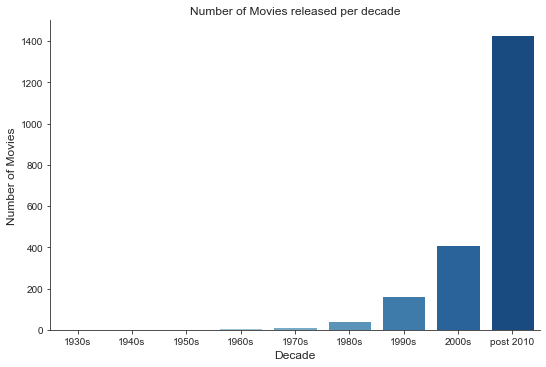

In [75]:
# Plot number of movies released per decade
# Use Seaborn kind = 'count' to do the counting for us
# Set aspect to 1.5 to avoid xticks overlapping.
sns.catplot(x = 'decade', kind = 'count', palette = 'Blues', data = movies, aspect = 1.5)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Decade', fontsize=12)
plt.title('Number of Movies released per decade', fontsize = 12)
plt.show()

From the visualisation and our domain knowledge, we can see that the 1930s to 1980s did not see many movies released each year - the industry was very much in its infancy and technology was developing. 

Let us 'zoom in' to post-1990 and plot the number of movies released per year from 1990 onwards.

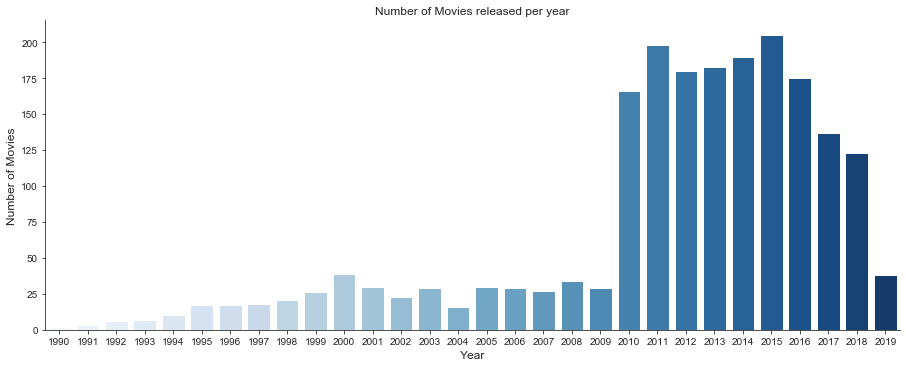

In [76]:
# Plot number of movies released per year 1990 onwards
# Same plot as above but now x is release_year and data is movies where release year >= 1990
# Increase aspect to 2.5 to improve readability
sns.catplot(x = 'release_year', kind = 'count', palette = 'Blues',
            data = movies[movies['release_year'] >=1990], aspect = 2.5)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Movies released per year', fontsize = 12)
plt.show()

Here we note a surprising jump between 2009 and 2010 - we would have expected a more gradual year on year increase. This could be due to our data or the film industry but worth bearing in mind. Perhaps the financial crash of 2008 led to many films being halted mid-production. Also note that the data was gathered mid-2019 and as such we do not have the full numbers for 2019. When we look to investigate recent trends it makes sense to consider specifically **2010 onwards**.

## Profit and Profit Margin

The business value of this venture relies on making profit. In this section we will investigate both profit and profit margin. However note that this is a simplified analysis. Worldwide gross is not the only revenue stream, with merchandise sales, DVD sales and streaming rights also generating revenue. Likewise the production budget excludes costs such as advertising which are seen as the responsibility of the distributor. We would need to understand whether the Company is also looking to distribute.

Note that the movie industry is notorious for having opaque accounting methods and we would advise seeking specialist advice regarding budget and financials. The below is designed to give a flavour based on published data.

In our analysis we define **profit** as follows:
<br> <center> profit = worldwide gross revenue - production budget

And we define **profit margin** to be:
<br><center> profit margin = (worldwide gross revenue - production budget) / worldwide gross revenue

In [77]:
# Create profit column 
movies['profit'] = movies.apply(lambda x: (x['worldwide_gross']) - (x['production_budget']), axis = 1)

In [78]:
# Get summary statistics for profit
# Use plain formatting to remove scientific notation
movies['profit'].describe().apply(lambda x: format(x, 'f'))

count          2084.000000
mean       81112740.337332
std       183543483.470248
min      -200237650.000000
25%        -1406246.750000
50%        15904174.500000
75%        80066414.750000
max      2351345279.000000
Name: profit, dtype: object

Profit (or loss) varies immensely ranging from a \\$200 million loss to a \\$2 billion profit. The median indicates profit of approx. \\$ 16 million.
As discussed there is insufficient detail to really make sense of a movie's profitability.

Let us see how `profit` relates to `worldwide_gross`.

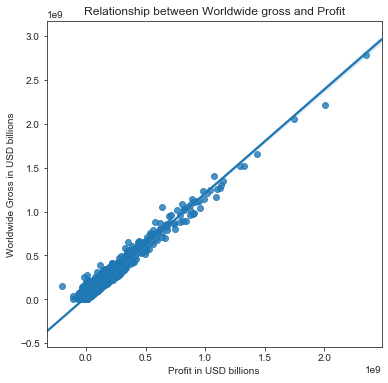

In [79]:
# Plot relationship between profit and worldwide gross
plt.figure(figsize = (6,6))
sns.regplot(x = 'profit', y = 'worldwide_gross', data = movies)
plt.title('Relationship between Worldwide gross and Profit')
plt.xlabel('Profit in USD billions')
plt.ylabel('Worldwide Gross in USD billions')
plt.show()

The two variables look to be highly correlated. **When we speak of top grossing films, we can therefore assume we are also speaking of top profitable films (using our simplified definition of profit above.)**

Let us investigate profit further in the case of recent movies and top grossing. In particular we will analyze the **top 100 grossing movies post-2010**.

In [80]:
# Set recent movies as movies post 2010
recentmovies = movies[movies['release_year'] >= 2010]

# Set toprecent movies as top 100 movies post-2010
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

# Describe profit
# Use plain format to remove scientific notation - improves readability
toprecentmovies['profit'].describe().apply(lambda x: format(x, 'f'))

count           100.000000
mean      691605832.340000
std       259663089.720533
min       326477240.000000
25%       501262532.000000
50%       619951567.000000
75%       842264720.500000
max      1748134200.000000
Name: profit, dtype: object

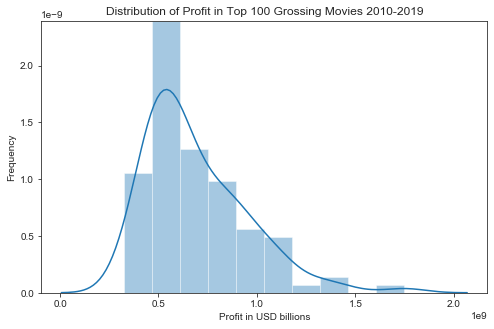

In [81]:
# Plot distribution of profit for toprecentmovies using distplot
plt.figure(figsize = (8,5))
sns.distplot(toprecentmovies['profit'])
plt.title('Distribution of Profit in Top 100 Grossing Movies 2010-2019')
plt.xlabel('Profit in USD billions')
plt.ylabel('Frequency')
plt.show()

We see that the median profit is around \\$ 600 million. At a minimum a top 100 movie resulted in a profit of \\$ 300 million.

Let us know investigate profit margin.

In [82]:
# Create profit margin column
movies['profit_margin'] = movies.apply(lambda x: ((x['profit']) / (x['worldwide_gross']))*100, axis = 1)

In [83]:
# Get summary statistics for profit margin
# Use plain formatting to remove scientific notation
movies['profit_margin'].describe().apply(lambda x: format(x, 'f'))

count        2084.000000
mean        -3961.209081
std         87412.139510
min      -3846053.846154
25%           -41.432339
50%            48.808903
75%            74.379810
max            99.759941
Name: profit_margin, dtype: object

There is a significant outlier with a hugely negative margin. Moreover a significant proportion of movies have a negative margin, where the movie made a loss. We will focus our analysis on the **top 100 grossing movies post-2010**.

In [84]:
# Set recent movies as movies post 2010
recentmovies = movies[movies['release_year'] >= 2010]

# Set toprecent movies as top 100 movies post-2010
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

# Describe profit margin for toprecentmovies
toprecentmovies['profit_margin'].describe()

count    100.000000
mean      79.614097
std        8.313902
min       54.264473
25%       75.319471
50%       80.140636
75%       85.518691
max       94.981776
Name: profit_margin, dtype: float64

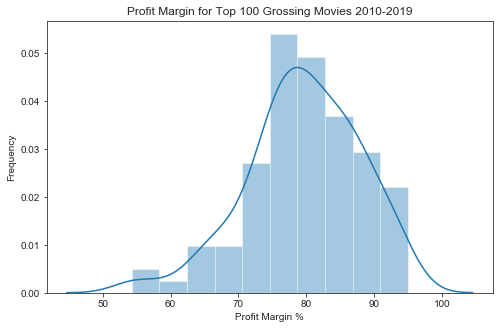

In [85]:
# Plot distribution of profitmargin for toprecentmovies using distplot
plt.figure(figsize = (8,5))
sns.distplot(toprecentmovies['profit_margin'])
plt.title('Profit Margin for Top 100 Grossing Movies 2010-2019')
plt.xlabel('Profit Margin %')
plt.ylabel('Frequency')
plt.show()

The profit margin for a top 100 grossing movie is around 80%.

Let us obtain details of the top profit movies and top profit margin movies, amongst movies released post 2010.

In [86]:
# Get top 5 profit movies post 2010
topprofit = recentmovies.sort_values('profit', ascending = False)
topprofit.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin
138,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,149.0,"Action,Adventure,Sci-Fi",post 2010,1748134200,85.352522
484,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,tt0369610,124.0,"Action,Adventure,Sci-Fi",post 2010,1433854864,86.960647
655,2015-04-03,Furious 7,190000000,353007020,1518722794,2015,tt2820852,137.0,"Action,Crime,Thriller",post 2010,1328722794,87.489488
1091,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,tt0848228,143.0,"Action,Adventure,Sci-Fi",post 2010,1292935897,85.177240
140,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,tt1825683,134.0,"Action,Adventure,Sci-Fi",post 2010,1148258224,85.166046


In [87]:
# Get top 5 profit margin movies post 2010
topprofitmargin = recentmovies.sort_values('profit_margin', ascending = False)
topprofitmargin.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin
648,2015-07-10,The Gallows,100000,22764410,41656474,2015,tt2309260,81.0,"Horror,Mystery,Thriller",post 2010,41556474,99.759941
1154,2012-01-06,The Devil Inside,1000000,53262945,101759490,2012,tt1560985,83.0,Horror,post 2010,100759490,99.017291
1400,2011-04-01,Insidious,1500000,54009150,99870886,2011,tt1591095,103.0,"Horror,Mystery,Thriller",post 2010,98370886,98.498061
549,2015-04-17,Unfriended,1000000,32789645,64364198,2015,tt3713166,83.0,"Horror,Mystery,Thriller",post 2010,63364198,98.446341
1556,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,2010,tt1536044,91.0,Horror,2000s,174512032,98.309974


We note that the movies with the highest profit differ significantly to those whith the highest profit margin. The top profit movies are the action and adventure blockbusters we would expect, with huge production budgets and record-breaking worldwide gross figures. However the movies with the highest profit margin have much smaller budgets and appear to be horror films.

## Impact of Budget

In this section we will provide insights on a movie's production budget. The production budget typically includes *above the line* (creative talent such as director, producer salaries), *below the line* (direct production costs), *post-production* (editing, visual effects), and *other* (e.g. insurance.)

Again budget data is difficult to obtain and can be unreliable as studios try and keep this information hidden and/or use accounting tactics to manipulate the figures.

Nonetheless, let us attempt to answer whether the **budget is a key indicator of top performance** and **what production budget should the Company allocate per movie**.

In [88]:
# Preview relevant columns
movies[['movie', 'production_budget']]

,movie,production_budget
0,Captain Marvel,175000000
1,Rocketman,41000000
2,The Intruder,8000000
3,Dragon Ball Super: Broly,8500000
4,How to Train Your Dragon: The Hidden World,129000000
...,...,...
2079,Bambi,858000
2080,Fantasia,2280000
2081,Rebecca,1288000
2082,Snow White and the Seven Dwarfs,1488000


In [89]:
# Describe production budget
# Use plain formatting to remove scientific notation
movies['production_budget'].describe().apply(lambda x: format(x, 'f'))

count         2084.000000
mean      39546872.358925
std       51173832.047534
min           9000.000000
25%        7000000.000000
50%       20000000.000000
75%       50000000.000000
max      425000000.000000
Name: production_budget, dtype: object

Using the statistics above we will define categories based on the production budget and create a boxplot to visualise the worldwide gross in relation to the budget. We are trying to understand
- if a higher budget leads to higher worldwide gross
- how much the worldwide gross varies for films within a set budget range

In [90]:
# Define bins based on statistics
bins = [0, 7000000, 20000000, 50000000, np.inf]
names = ['<7m', '7-20m', '20-50m', '>50m']

In [91]:
# Create budget_range column
movies['budget_range'] = pd.cut(movies['production_budget'], bins, labels=names)

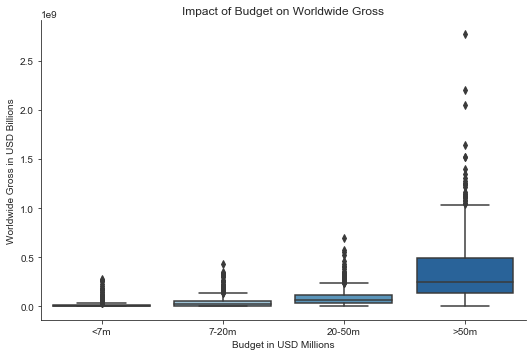

In [92]:
# Boxplot of Bugdet Range
sns.catplot(x = 'budget_range', y = 'worldwide_gross', aspect = 1.5, kind = 'box', 
            palette="Blues", data = movies)
plt.title('Impact of Budget on Worldwide Gross')
plt.xlabel('Budget in USD Millions')
plt.ylabel('Worldwide Gross in USD Billions')
plt.show()

From the visualisation, it appears that a budget of at least \\$ 50 million, which represents the top 25\% of production budgets leads to higher worldwide gross figures when restricted to the inner quartiles. However let us look closer into the budget by focussing on recent top grossing movies.

In [93]:
# Set recent movies as movies post 2010
recentmovies = movies[movies['release_year'] >= 2010]

# Set toprecent movies as top 100 movies post-2010
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

In [94]:
# Describe production budget
# Use plain formatting to remove scientific notation
toprecentmovies['production_budget'].describe().apply(lambda x: format(x, 'f'))

count          100.000000
mean     167792000.000000
std       66933194.011686
min       35000000.000000
25%      126500000.000000
50%      170000000.000000
75%      200000000.000000
max      410600000.000000
Name: production_budget, dtype: object

Using the statistics above, it makes sense to redefine our budget categories and then create a boxplot.

In [95]:
# Define bins based on statistics
bins = [0, 100000000, 150000000, 200000000, np.inf]
names = ['35-100m', '100-150m', '150-200m','200-420m' ]

In [96]:
# Reassign budget_range column
toprecentmovies['budget_range'] = pd.cut(toprecentmovies['production_budget'], bins, labels=names)

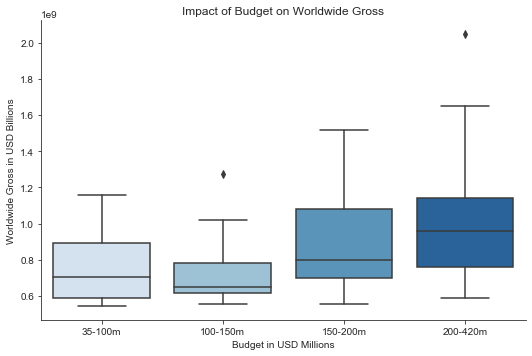

In [97]:
# Boxplot of budget range
sns.catplot(x = 'budget_range', y = 'worldwide_gross', kind = 'box', palette="Blues",
            aspect = 1.5, data = toprecentmovies)
plt.title('Impact of Budget on Worldwide Gross')
plt.xlabel('Budget in USD Millions')
plt.ylabel('Worldwide Gross in USD Billions')
plt.show()

**Summary of Findings and Recommendations**

Based on the available data, the production budget varies greatly, ranging from \\$9,000 to more than \\$400 million. Restricting to the top 100 grossing movies post 2010 gives a budget range between \\$35 million and \\$410 million.

Spending more on a movie does not necessarily equate to a higher worldwide gross (and thus profit.)

We would recommend a budget of around **\\$150-200 million**.

## Runtime

Let us now investigate the runtime of a movie. We will start with our `movies` DataFrame and then focus on recent movies (post-2010) and finally top 100 grossing movies post-2010.
We will seek to answer whether **runtime is a key indicator of performance** and **what runtime should the Company aim for**.

In [98]:
# Preview relevant columns
movies[['movie', 'runtime_minutes']]

,movie,runtime_minutes
0,Captain Marvel,123.0
1,Rocketman,121.0
2,The Intruder,102.0
3,Dragon Ball Super: Broly,100.0
4,How to Train Your Dragon: The Hidden World,104.0
...,...,...
2079,Bambi,58.0
2080,Fantasia,86.0
2081,Rebecca,87.0
2082,Snow White and the Seven Dwarfs,49.0


In [99]:
# Get statistics for runtime for movies
movies['runtime_minutes'].describe()

count    2084.000000
mean      101.222169
std        23.391840
min         4.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       312.000000
Name: runtime_minutes, dtype: float64

In [100]:
# Define function to plot, as we may wish to plot runtime for various dataframes

def runtimeplot(df,title):
    ''' Creates a Seaborn distplot of runtime_minutes column'''
    sns.distplot(df['runtime_minutes'])
    plt.title(title)
    plt.xlabel('Minutes')
    plt.ylabel('Frequency')
    return plt.show()

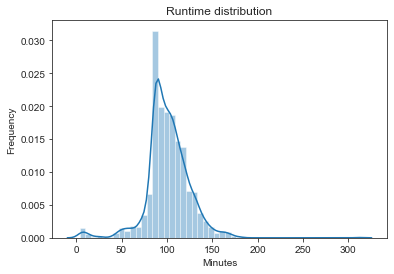

In [101]:
# Call runtimeplot function on movies DataFrame
runtimeplot(movies, 'Runtime distribution')

We see that the median runtime is exactly 100 minutes. 

In [102]:
# Get statistics for runtime for recentmovies
recentmovies['runtime_minutes'].describe()

count    1595.000000
mean      105.170533
std        20.575771
min         5.000000
25%        92.000000
50%       104.000000
75%       117.000000
max       181.000000
Name: runtime_minutes, dtype: float64

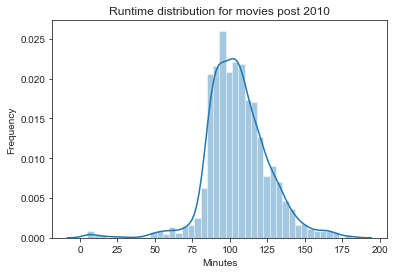

In [103]:
# Call runtimeplot function on recentmovies DataFrame
runtimeplot(recentmovies, 'Runtime distribution for movies post 2010')

Focusing on movies post-2010 does not lead to noticeable differences. The movies are a few minutes longer on average.
<br>Let us now look at the runtime of the top 100 grossing movies post-2010.

In [104]:
# Get statistics for runtime for toprecentmovies
toprecentmovies['runtime_minutes'].describe()

count    100.000000
mean     121.810000
std       23.017207
min       48.000000
25%      103.750000
50%      124.000000
75%      137.000000
max      169.000000
Name: runtime_minutes, dtype: float64

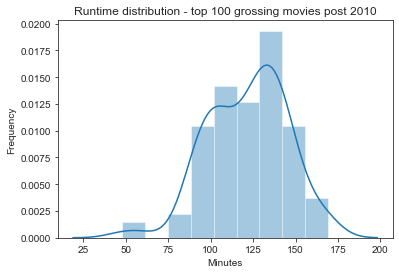

In [105]:
# Call runtimeplot function on toprecentmovies DataFrame
runtimeplot(toprecentmovies, 'Runtime distribution - top 100 grossing movies post 2010')

We see that the top films tend to be longer, with a median of 124 minutes or just over 2 hours long.

Let us see if there is a linear relationship between `runtime_minutes` and `worlwide_gross`.

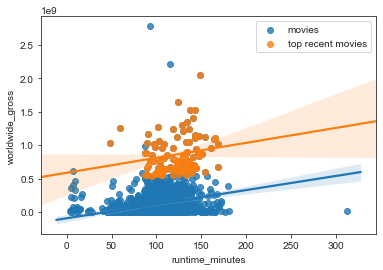

In [106]:
# Regplot between runtime and worldwide gross
sns.regplot(x = 'runtime_minutes', y = 'worldwide_gross', label = 'movies', data = movies)
sns.regplot(x = 'runtime_minutes', y = 'worldwide_gross', label = 'top recent movies', data = toprecentmovies)
plt.legend()
plt.show()

There does not appear to be a strong correlation between `runtime_minutes` and `worldwide_gross`.

We may wonder whether a longer movie involves a larger production budget. Let us look at the relationship between these two variables.

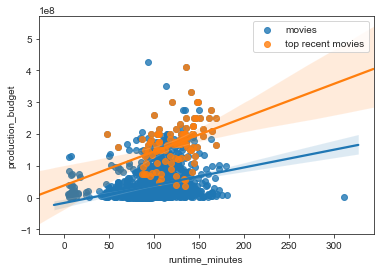

In [107]:
# Regplot between runtime and budget
sns.regplot(x = 'runtime_minutes', y = 'production_budget', label = 'movies', data = movies)
sns.regplot(x = 'runtime_minutes', y = 'production_budget', label = 'top recent movies', data = toprecentmovies)
plt.legend()
plt.show()

There does not appear to be a strong correlation between `runtime_minutes` and `production_budget`.

**Summary of Findings and Recommendations**
<br><br> We first discovered that the average runtime for a movie is 100 minutes. We then saw that the average runtime for a movie in the top 100 grossing movies post 2010 is around 120 minutes or 2 hours long. A longer runtime therefore appears to be a noticeable trait of a successful movie.
<br> Note however that there does not appear to be a correlation between runtime and worldwide gross, nor runtime and production budget.
<br> We would advise aiming for a **runtime of around 120 minutes**.

## Genre

Let us now investigate the genre of a movie. We will start with our `movies` DataFrame and then focus on recent movies (post-2010) and finally top 100 grossing movies post-2010.
We will seek to answer **which genre of movie the Company should look to produce**.

In [108]:
# Preview relevant columns
movies[['movie', 'genres']].head()

,movie,genres
0,Captain Marvel,"Action,Adventure,Sci-Fi"
1,Rocketman,"Biography,Drama,Music"
2,The Intruder,"Drama,Horror,Mystery"
3,Dragon Ball Super: Broly,"Action,Adventure,Animation"
4,How to Train Your Dragon: The Hidden World,"Action,Adventure,Animation"


In [109]:
# Obtain unique values in genres column
genres = movies['genres'].unique()
genres

array(['Action,Adventure,Sci-Fi', 'Biography,Drama,Music',
       'Drama,Horror,Mystery', 'Action,Adventure,Animation',
       'Adventure,Comedy,Family', 'Drama', 'Drama,Mystery,Sci-Fi',
       'Action,Adventure,Fantasy', 'Comedy,Drama',
       'Adventure,Animation,Comedy', 'Comedy,Romance',
       'Biography,Drama,History', 'Action,Adventure,Comedy',
       'Sci-Fi,Thriller', 'Adventure,Family,Fantasy',
       'Action,Comedy,Crime', 'Biography,Drama,Mystery',
       'Action,Crime,Drama', 'Horror,Mystery,Thriller',
       'Action,Adventure,Family', 'Drama,Romance',
       'Drama,Sci-Fi,Thriller', 'Comedy,Fantasy,Romance',
       'Biography,Drama', 'Horror,Thriller', 'Action,Drama,Sci-Fi',
       'Action,Adventure,Crime', 'Horror', 'Biography,Crime,Drama',
       'Action,Adventure,Thriller', 'Comedy,Drama,Romance',
       'Adventure,Comedy,Crime', 'Drama,Horror,Sci-Fi',
       'Action,Sci-Fi,Thriller', 'Comedy', 'Crime,Drama,Mystery',
       'Comedy,Crime,Drama', 'Drama,Romance,Thriller

As we can see, movies have been allocated up to three genres. We will look to identify the unique individual genres by making use of the `.split()` method and `set` function.

In [110]:
# Split genres
splitgenres = []
for genre in genres:
    splitgenres += genre.split(',')
splitgenres[:5]

['Action', 'Adventure', 'Sci-Fi', 'Biography', 'Drama']

In [111]:
# Use set to obtain unique values
uniquegenres = set(splitgenres)
uniquegenres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [112]:
# Turn back to list to be able to sort alphabetically
listofgenres = list(uniquegenres)
sortedgenres = sorted(listofgenres)
sortedgenres[:5]

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy']

We now have an alphabetic list of genres. Our process will be to create a new column in the `movies` DataFrame for each of these genres. We will intially set the value to be `0`. We will then iterate through the genres column and change the value to `1` in the columns which match the movie's genre.

In [113]:
# Create columns with genres
for genre in sortedgenres:
    movies[genre] = 0

In [114]:
# Split genres in genres column
movies['genres'] = movies['genres'].map(lambda x : x.split(','))

In [115]:
# Map to columns - set to 1 if genre applies
for index, genres in enumerate(movies['genres']):
    for genre in genres:
        movies.loc[index,genre] = 1

In [116]:
# Visualising the new columns
movies.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"[Action, Adventure, Sci-Fi]",post 2010,...,0,0,0,0,0,1,0,0,0,0
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"[Biography, Drama, Music]",post 2010,...,1,0,0,0,0,0,0,0,0,0


In [117]:
# Checking the process worked with example genre Action
movies[['genres','Action']][:5]

,genres,Action
0,"[Action, Adventure, Sci-Fi]",1
1,"[Biography, Drama, Music]",0
2,"[Drama, Horror, Mystery]",0
3,"[Action, Adventure, Animation]",1
4,"[Action, Adventure, Animation]",1


We will now define a function to go through each genre column and sum the values, thus counting the number of movies of that genre. The function will store the values in a dictionary with `key` the name of the genre and `value` the number of movies. It will also sort the dictionary based on value counts and remove any 0 values (this will be useful when we run the function on smaller DataFrames which may not have movies of every genre). <br>Note that as a movie was allocated up to three genres, the total counts will far exceed the number of movies in our dataset.

In [118]:
# genre counter function
def genrecounter(df):
    '''
    param1 df: dataframe
    returns dictionary with genre key and value count
    also sorts dictionary based on values and removes 0 values
    ''' 
    # Start with empty dictionary
    genredict = {}
    
    # Get genre columns
    genrecols = df.loc[:, 'Action':'Western'].columns
    
    # Go through each column and sum it
    for col in genrecols:
        genredict[col] = df[col].sum()
        
    # sort dictionary based on counts, ascending order so reverse = True    
    sortedgenresdict = {keys: values for keys, values in \
                        sorted(genredict.items(), key = lambda item: item[1], reverse = True)}
    
    # remove any key-value pairs where the value is 0
    nonnulgenresdict = {keys: values for keys, values in \
                        sortedgenresdict.items() if values != 0}

    return nonnulgenresdict

In [119]:
# Run genre counter function on Movies DataFrame
allgenrescount = genrecounter(movies)
display(allgenrescount)

# Get len of DataFrame to put into context
len(movies)

{'Drama': 999,
 'Comedy': 597,
 'Action': 494,
 'Adventure': 380,
 'Thriller': 322,
 'Crime': 258,
 'Horror': 231,
 'Romance': 223,
 'Documentary': 188,
 'Biography': 162,
 'Sci-Fi': 159,
 'Mystery': 151,
 'Fantasy': 136,
 'Family': 114,
 'Animation': 113,
 'Music': 61,
 'History': 55,
 'Sport': 44,
 'War': 34,
 'Western': 19,
 'Musical': 12,
 'News': 3}

2084

In [120]:
# Define function to plot genres - use Seaborn barplot
# Manually choose figsize so the genres can be easily read on the y-axis

def genreplot(dictionary,title):
    ''' 
    Param1 dictionary
    Param2 title for the plot
    Returns barplot from a genre dictionary 
    '''
    x_values = list(dictionary.keys())
    y_values = list(dictionary.values())
    plt.figure(figsize = (15,10))
    with sns.plotting_context('notebook',font_scale=1.5):
        sns.barplot(y = x_values, x = y_values, palette = 'Blues_d')
    plt.xlabel('Number of movies')
    plt.ylabel('Genre')
    plt.title(title, fontsize = 20)
    return plt.show()

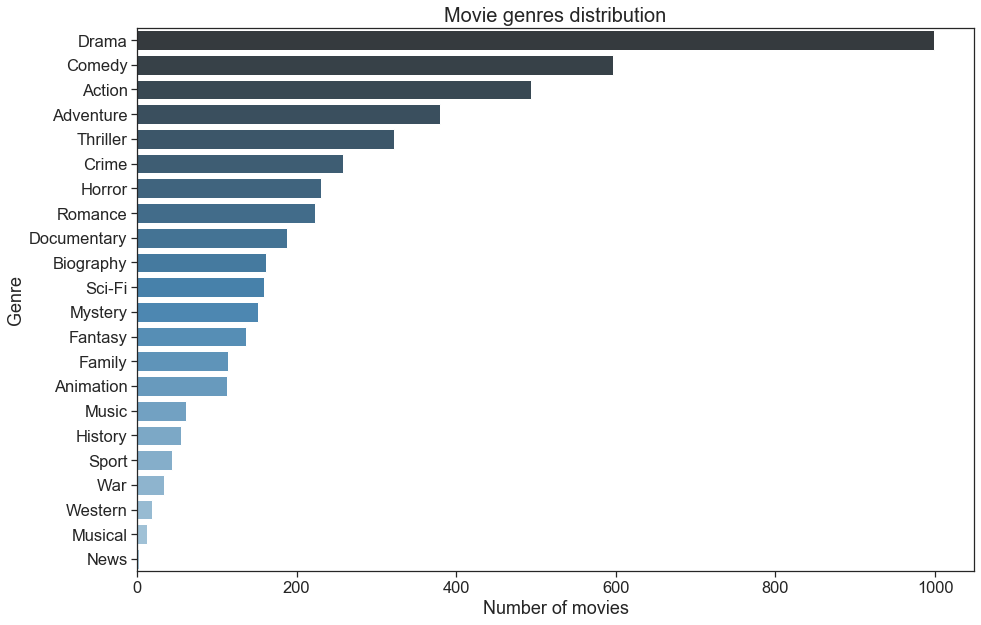

In [121]:
# Run genreplot function on allgenrescount - the result of the counter for all movies
genreplot(allgenrescount,'Movie genres distribution')

Over half of movies fall into the **drama** category. The most common genres are **drama**, **comedy**, **action** and **adventure**.

We will now investigate recent movies (post-2010.)

In [122]:
# Obtain recent movies
recentmovies = movies[movies['release_year'] >= 2010]

# Run genre counter function on recentmovies DataFrame
recentgenrescount = genrecounter(recentmovies)
display(recentgenrescount)

# Get len of DataFrame to put into context
len(recentmovies)

{'Drama': 772,
 'Comedy': 524,
 'Action': 440,
 'Adventure': 347,
 'Thriller': 248,
 'Crime': 232,
 'Romance': 193,
 'Horror': 179,
 'Biography': 142,
 'Sci-Fi': 138,
 'Mystery': 128,
 'Fantasy': 125,
 'Animation': 103,
 'Documentary': 91,
 'Family': 87,
 'Music': 51,
 'History': 48,
 'Sport': 33,
 'War': 24,
 'Western': 14,
 'Musical': 7,
 'News': 2}

1595

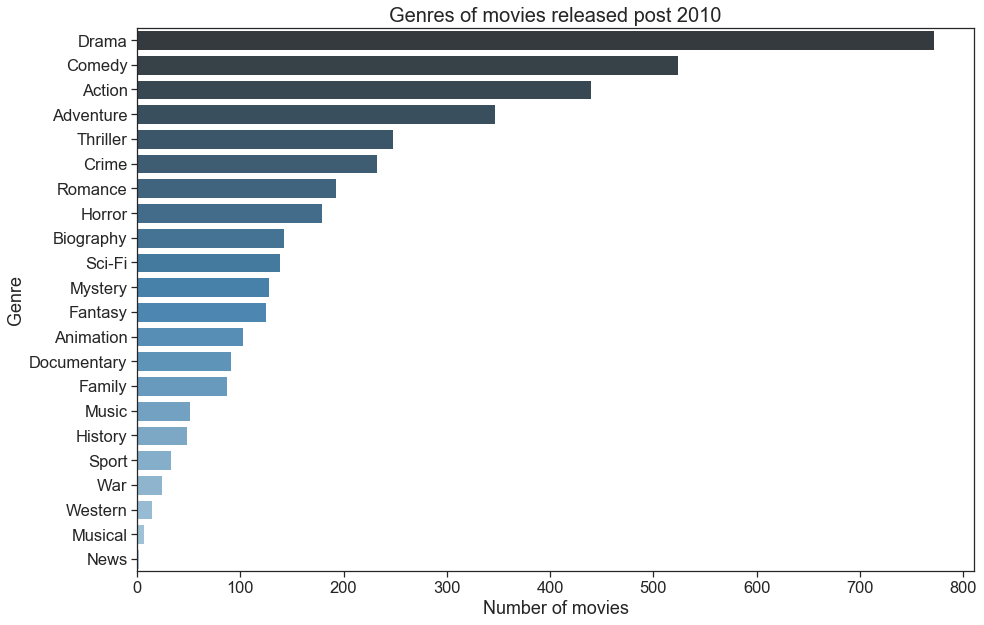

In [123]:
# Plot recent movie genres
genreplot(recentgenrescount,'Genres of movies released post 2010')

The most popular genres are similar to that seen for the larger `movies` DataFrame. Restricting to post-2010 has not resulted in notable changes. 

We will now investigate the top 100 grossing movies post-2010.

In [124]:
# Obtain top recent movies
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

# Run genre counter function on toprecentmovies DataFrame
toprecentgenrescount = genrecounter(toprecentmovies)
toprecentgenrescount

{'Adventure': 82,
 'Action': 60,
 'Sci-Fi': 31,
 'Comedy': 30,
 'Animation': 26,
 'Fantasy': 19,
 'Drama': 12,
 'Thriller': 10,
 'Family': 9,
 'Crime': 3,
 'Biography': 2,
 'Documentary': 1,
 'Horror': 1,
 'Music': 1,
 'Musical': 1,
 'Mystery': 1,
 'Romance': 1}

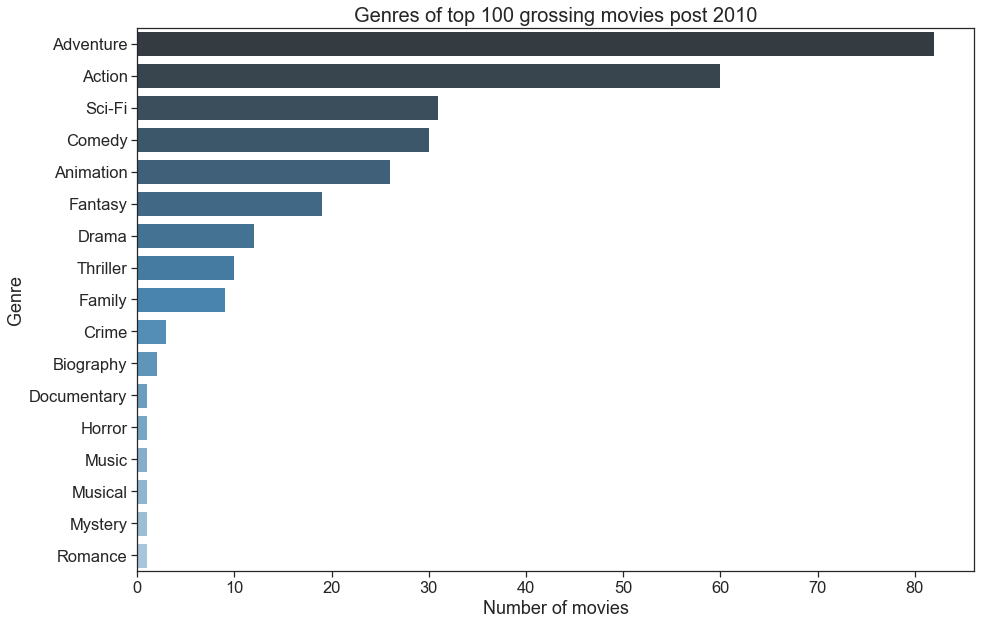

In [125]:
# Plot top recent movie genres
genreplot(toprecentgenrescount,'Genres of top 100 grossing movies post 2010')

More than 80% of movies fall into the **adventure** category and 60% fall into **action**. **Sci-fi**, **comedy** and **animation** are also well represented. 

Let us investigate top 100 grossing movies post 2010 described as **action** and/or **adventure** movies.

In [126]:
# Get action or adventure movies
topactionadventuremovies = toprecentmovies[(toprecentmovies['Action'] == 1) | (toprecentmovies['Adventure'] == 1)]

In [127]:
# Get median budget for action/adventure movies
topactionadventuremovies['production_budget'].median()

175000000.0

In [128]:
# Get median budget for recent movies
recentmovies['production_budget'].median()

22000000.0

Based on the `production_budget`, it appears that an **action/adventure** movies costs on average \\$ 45 million more.

Let us see how **action** and **adventure** movies have evolved since 2010.

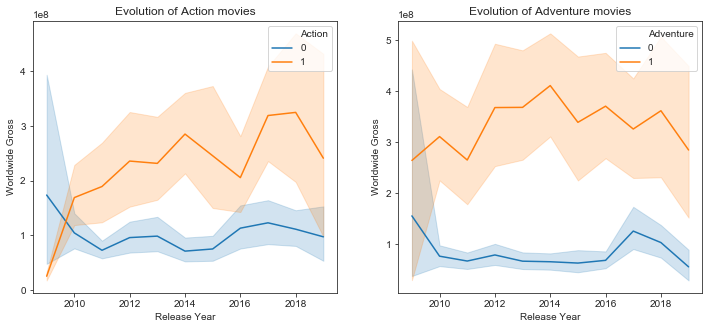

In [129]:
# Plot worldwide gross for action an adventure movies as a function of time - lineplot

# Create a figure and axes
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,5))

# Create first lineplot for action movies
sns.lineplot(x = 'release_year', y = 'worldwide_gross', hue = 'Action'
             , data = movies[movies['release_year']>= 2009], ax = ax[0])
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Worldwide Gross')
ax[0].set_title('Evolution of Action movies')

# Create first lineplot for adventure movies
sns.lineplot(x = 'release_year', y = 'worldwide_gross', hue = 'Adventure'
             , data = movies[movies['release_year']>= 2009], ax = ax[1])
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Worldwide Gross')
ax[1].set_title('Evolution of Adventure movies')

# Display plot
plt.show()

Action movies rose to popularity in 2010 and have been outperforming non-action movies since.
Adventure movies have consistantly outperformed non-adventure movies since 2009.

What do we expect going forward? Recall our `futuremovies` DataFrame that we created when cleaning the `imdb` DataFrame.

In [130]:
futuremovies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,87.0,"Action,Adventure,Fantasy"
93,tt0427340,Masters of the Universe,Masters of the Universe,2021,87.0,"Action,Adventure,Drama"
229,tt0499097,Without Remorse,Without Remorse,2020,87.0,"Action,Crime,Drama"
289,tt0805647,The Witches,The Witches,2020,87.0,"Adventure,Comedy,Family"
386,tt0870154,Jungle Cruise,Jungle Cruise,2020,87.0,Adventure


We will follow the same steps as above to split the genres and visualise their popularity.

In [131]:
# Reset index - required as we will use enumerate to iterate through the genre column
# and change the value to 1 where a genre applies
futuremovies = futuremovies.reset_index(drop = True)

In [132]:
# Obtain unique values in genres column
genres = futuremovies['genres'].unique()
genres[:5]
# Split genres
splitgenres = []
for genre in genres:
    splitgenres += genre.split(',')
splitgenres[:5]
# Use set to obtain unique values
uniquegenres = set(splitgenres)
uniquegenres
# Turn back to list to be able to sort alphabetically
listofgenres = list(uniquegenres)
sortedgenres = sorted(listofgenres)
sortedgenres[:5]
# Create columns with genres
for genre in sortedgenres:
    futuremovies[genre] = 0

In [133]:
# Split genres in genres column
futuremovies['genres'] = futuremovies['genres'].map(lambda x : x.split(','))

In [134]:
# Map to columns - set to 1 if genre applies
for index, genres in enumerate(futuremovies['genres']):
    for genre in genres:
        futuremovies.loc[index,genre] = 1

In [135]:
# Run genre counter function on Movies DataFrame
futuregenrescount = genrecounter(futuremovies)
futuregenrescount

{'Drama': 338,
 'Comedy': 185,
 'Action': 179,
 'Thriller': 137,
 'Horror': 113,
 'Adventure': 99,
 'Documentary': 84,
 'Animation': 65,
 'Crime': 62,
 'Sci-Fi': 58,
 'Fantasy': 55,
 'Romance': 45,
 'Family': 43,
 'Mystery': 29,
 'Biography': 27,
 'History': 16,
 'Musical': 11,
 'Western': 9,
 'Music': 8,
 'War': 6,
 'Sport': 2,
 'News': 1}

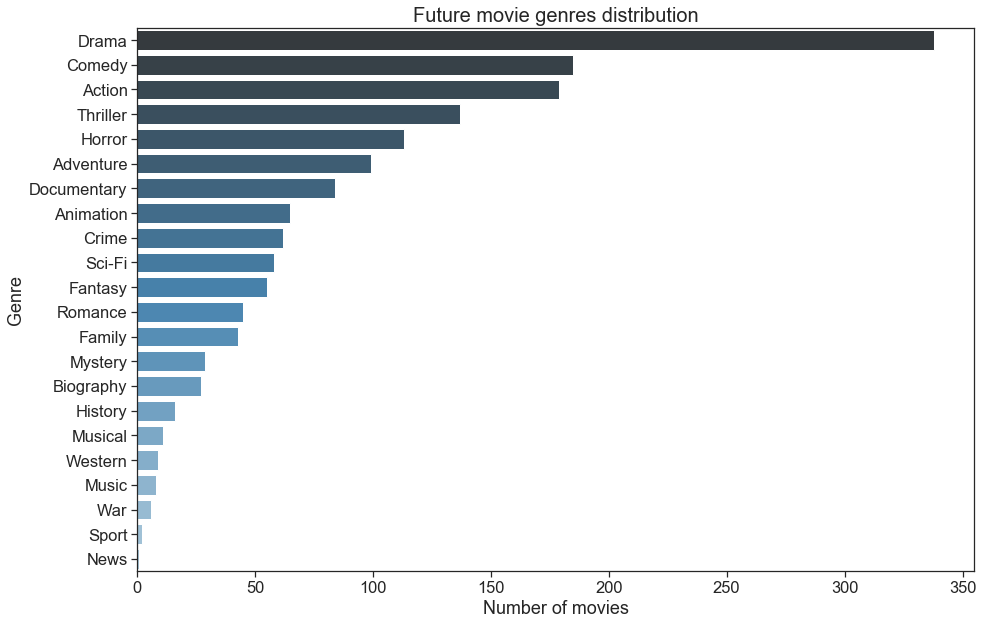

In [136]:
# Plot genres using the genreplot function we defined
genreplot(futuregenrescount,'Future movie genres distribution')

From the visualisation we can expect to see more **drama** and **comedy** movies released in the near future. These movies are expected to be released in the 2020s (with the exception of the mysterious movie set for year 2115.) However we would caution putting much weight into this as it is more likely that future movies simply have not been added to the database yet.

**Summary of Findings and Recommendations**

We discovered that more than 80% of the top 100 grossing movies post 2010 can be described as **adventure** movies and 60% fall into **action**. As a movie can have up to three associated genres, we would consider the combination of **action/adventure** to be most successful based on current trends.

Note however than an **action/adventure** movie costs on average \\$ 45 million more.

Other genres to consider would be **sci-fi**, **comedy** or **animation**.

We would advise aiming to produce an **action/adventure movie**.

## Release date

### Release month

Let us now investigate the **release month** of a movie. We will start with our `movies` DataFrame and then focus on recent movies (post-2010) and finally top 100 grossing movies post-2010.
We will seek to answer **when should the Company look to release its movie**.

In [137]:
# View relevant columns
movies[['release_date', 'movie']]

,release_date,movie
0,2019-03-08,Captain Marvel
1,2019-05-31,Rocketman
2,2019-05-03,The Intruder
3,2019-01-16,Dragon Ball Super: Broly
4,2019-02-22,How to Train Your Dragon: The Hidden World
...,...,...
2079,1942-08-13,Bambi
2080,1940-11-13,Fantasia
2081,1940-03-21,Rebecca
2082,1937-12-21,Snow White and the Seven Dwarfs


In [138]:
# Create month column 
movies['release_month'] = pd.DatetimeIndex(movies['release_date']).month

In [139]:
# View relevant columns/ check
movies[['release_date', 'release_month', 'movie']].head()

,release_date,release_month,movie
0,2019-03-08,3,Captain Marvel
1,2019-05-31,5,Rocketman
2,2019-05-03,5,The Intruder
3,2019-01-16,1,Dragon Ball Super: Broly
4,2019-02-22,2,How to Train Your Dragon: The Hidden World


We will visualise both the number of movies released each month and the worldwide gross per release month. As we will be creating similar visualisations for data subsets it will be useful to define a function.

In [140]:
# Plot release month for all movies
def releasemonthplot(df):
    fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,5))
    sns.catplot( x = 'release_month', kind = 'count', color = '#9ecae1',data = df, ax = ax[0])
    ax[0].set_xlabel('Release Month')
    ax[0].set_ylabel('Number of Movies')
    ax[0].set_title('Number of Movies released per Month')
    sns.catplot( x = 'release_month', y = 'worldwide_gross', kind = 'bar', color = '#3182bd', 
                data = df, ax = ax[1])
    ax[1].set_xlabel('Release Month')
    ax[1].set_ylabel('Worldwide Gross in USD billions')
    ax[1].set_title('Worldwide Gross per Release Month')
    plt.close(2)
    plt.close(3)
    return plt.show()

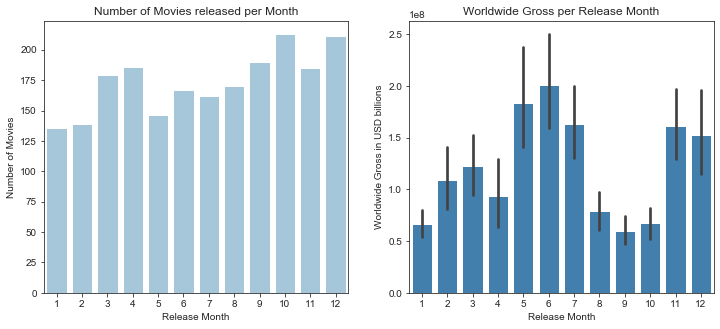

In [141]:
# Run function on movies DataFrame
releasemonthplot(movies)

From the visualisation we note that the number of movies ranges from approx. 130 in January (least popular) to approx. 210 in October (most popular). However `worldwide_gross` is significantly higher in May to July and November/December.

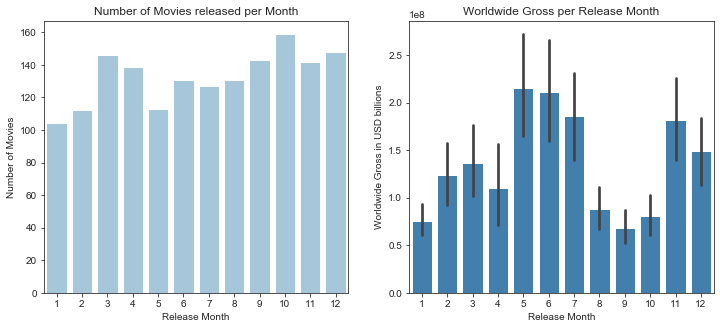

In [142]:
# Obtain recent movies
recentmovies = movies[movies['release_year'] >= 2010]

# Run function on recentmovies DataFrame
releasemonthplot(recentmovies)

We note recent movies follow the same patterns as seen above in the `movies` DataFrame.

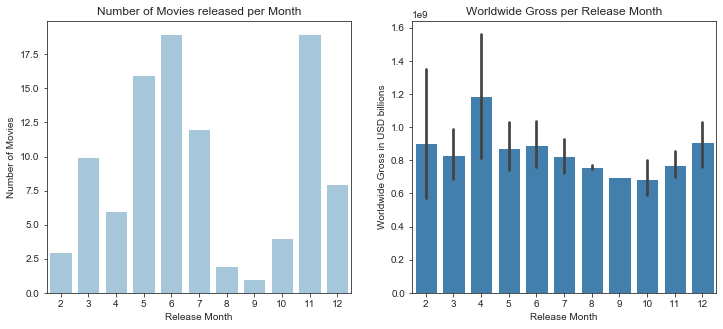

In [143]:
# Obtain top recent movies
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

# Run function on toprecentmovies DataFrame
releasemonthplot(toprecentmovies)

The most popular months in terms of number of top movies released are **May/June** and **November**. Worldwide gross is roughly the same each month when looking at top 100 grossing films.

We can question whether the top movies were successful in part because they were released at a specific time of the year. Looking at the previous visualisations for recent movies, we see that the number of top movies released each month mirrors the peaks in worldwide gross.

**Summary of Findings and Recommendations**

The top 100 grossing movies look to have been released at certain points in the year to maximise success. Taking into account of holidays and cinema-goers behaviours allows studios to increase the odds of a box office success. The most popular months are **May/June** and **November**.

**May** can be seen as the start of the Summer season and whilst children are still in school and it's not the Summer holidays yet, there is a certain hype surrounding *Summer blockbusters* and movies released then count on weekends being popular and there not (yet) being too many competing films at the box office. **June** can be seen as the ideal month to release a movie. By July/August the season is already ending.

**November and early December** release dates are ideal for distributors targetting the Awards (Golden Globe in January and Academy Awards in February) on the basis that the movie will be fresh in voters' minds.

We would advise aiming to release the movie in **May/June** or **November/early December**.

### Release day

Let us investigate the release day of the week.

In [144]:
# View relevant columns
movies[['release_date', 'movie']]

,release_date,movie
0,2019-03-08,Captain Marvel
1,2019-05-31,Rocketman
2,2019-05-03,The Intruder
3,2019-01-16,Dragon Ball Super: Broly
4,2019-02-22,How to Train Your Dragon: The Hidden World
...,...,...
2079,1942-08-13,Bambi
2080,1940-11-13,Fantasia
2081,1940-03-21,Rebecca
2082,1937-12-21,Snow White and the Seven Dwarfs


In [145]:
# Create day column 
movies['release_day'] = pd.DatetimeIndex(movies['release_date']).dayofweek

In [146]:
# View relevant columns/ check
movies[['release_date', 'release_day', 'movie']].head()

,release_date,release_day,movie
0,2019-03-08,4,Captain Marvel
1,2019-05-31,4,Rocketman
2,2019-05-03,4,The Intruder
3,2019-01-16,2,Dragon Ball Super: Broly
4,2019-02-22,4,How to Train Your Dragon: The Hidden World


Note that 0 is Monday and 6 is Sunday. Let us replace the numbers with the names of the days to improve clarity.

In [147]:
movies['release_day'] = movies['release_day'].replace([0,1,2,3,4,5,6],
                        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'])

In [148]:
# View relevant columns/ check
movies[['release_date', 'release_day', 'movie']].head()

,release_date,release_day,movie
0,2019-03-08,Friday,Captain Marvel
1,2019-05-31,Friday,Rocketman
2,2019-05-03,Friday,The Intruder
3,2019-01-16,Wednesday,Dragon Ball Super: Broly
4,2019-02-22,Friday,How to Train Your Dragon: The Hidden World


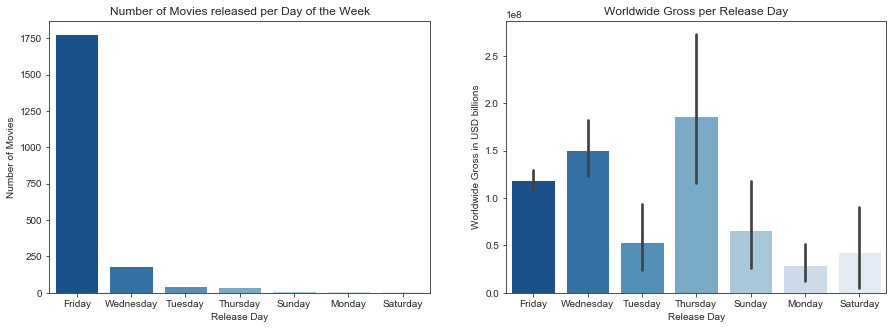

In [149]:
# Plot release day for all movies
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (15,5))
sns.catplot( x = 'release_day', kind = 'count', order = movies['release_day'].value_counts().index, 
            palette = 'Blues_r', data = movies, ax = ax[0])
ax[0].set_xlabel('Release Day')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Number of Movies released per Day of the Week')
sns.catplot( x = 'release_day', y = 'worldwide_gross', kind = 'bar', palette = 'Blues_r',
            order = movies['release_day'].value_counts().index,data = movies, ax = ax[1])
ax[1].set_xlabel('Release Day')
ax[1].set_ylabel('Worldwide Gross in USD billions')
ax[1].set_title('Worldwide Gross per Release Day')
plt.close(2)
plt.close(3)
plt.show()

Note that the vast majority of movies are released on a **Friday**, which makes sense as it capitalizes on the opening weekend at the box office! 

The release day of the week is likely to be dictated by the distributor and/or cinemas as such a studio may have little control over this aspect. We will not seek to investigate this attribute further.

## Correlations

Now that we have explored different attributes and created new features, let us check for any correlations we may have missed. We will remove the genre columns as they make the DataFrame unwieldy (and there is nothing to be gained from comparing one genre column to another). We will also focus on top 100 grossing movies post 2010.

In [150]:
# Drop genre cols
genrecols = toprecentmovies.loc[:, 'Action':'Western'].columns
relevantcols = toprecentmovies.drop(genrecols, axis = 1)

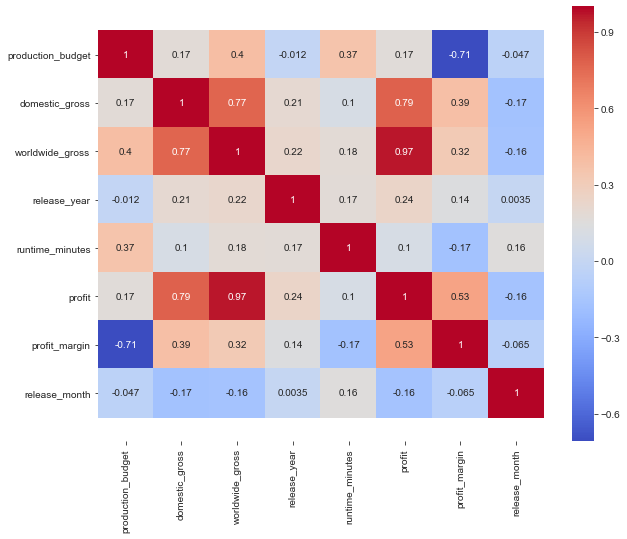

In [151]:
# Create correlation matrix
corr = relevantcols.corr()

# Set figsize
plt.figure(figsize = (10,8))

# Plot heatmap, choose color palette coolwarm and include correlation coeffs

ax = sns.heatmap(corr, cmap = 'coolwarm',annot=True)

# Adjust size of top and bottom rows due to matplotlib 3.1.1 bug
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Display plot
plt.show()

There is a strong positive correlation between `profit` and `worldwide_gross` as seen in section 3.2. As a reminder this means that based on our simplified notion of profit, we can assume the top 100 grossing movies are also the top 100 profitable movies.

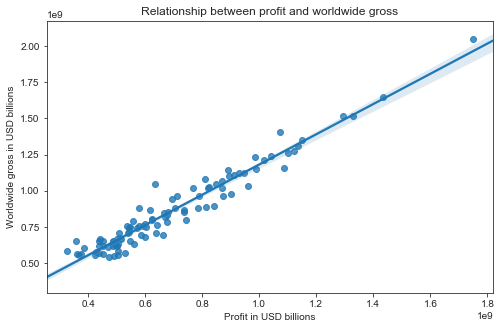

In [152]:
# Plot relationship between profit and worldwidegross
plt.figure(figsize = (8,5))
sns.regplot(x = 'profit', y = 'worldwide_gross', data = toprecentmovies)
plt.xlabel('Profit in USD billions')
plt.ylabel('Worldwide gross in USD billions')
plt.title('Relationship between profit and worldwide gross')
plt.show()

Note also the strong negative correlation between `profit_margin` and `production_budget`. This indicates that the larger the `production_budget`, the smaller the `profit_margin`. This makes sense as we saw the movies with high `profit_margin` had a small budget and were often horror movies, which may have seen unexpectedly high returns.

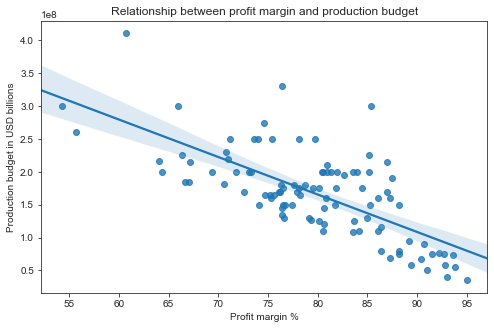

In [153]:
# Plot relationship between profit_margin and production_budget
plt.figure(figsize = (8,5))
sns.regplot(x = 'profit_margin', y = 'production_budget', data = toprecentmovies)
plt.xlabel('Profit margin %')
plt.ylabel('Production budget in USD billions')
plt.title('Relationship between profit margin and production budget')
plt.show()

## Case study: Netflix Original Films

In this section, we will explore Netflix Original Films on the basis that the Company may be interested in distributing its movies via its online TV and Movie portal.

Let us recall our `netflixdf` DataFrame from section 2.2

In [154]:
netflixdf.head()

,movie,genre,release_date,runtime_minutes,language
0,Beasts of No Nation,War/drama,2015-10-16,136,English/Twi
1,The Ridiculous 6,Western,2015-12-11,119,English
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,2016-02-26,103,English
3,Pee-wee's Big Holiday,Adventure,2016-03-18,89,English
4,Special Correspondents,Satire,2016-04-29,100,English


We will begin by investigating the number of movies released each year.

In [155]:
# Create new column release_year
netflixdf['release_year']=pd.DatetimeIndex(netflixdf['release_date']).year
netflixdf.head()

,movie,genre,release_date,runtime_minutes,language,release_year
0,Beasts of No Nation,War/drama,2015-10-16,136,English/Twi,2015
1,The Ridiculous 6,Western,2015-12-11,119,English,2015
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,2016-02-26,103,English,2016
3,Pee-wee's Big Holiday,Adventure,2016-03-18,89,English,2016
4,Special Correspondents,Satire,2016-04-29,100,English,2016


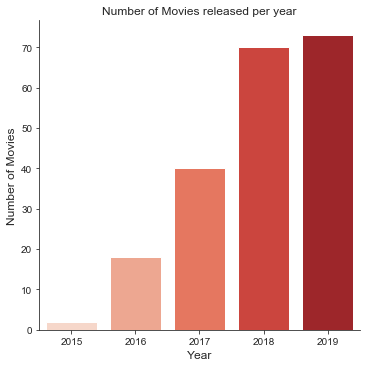

In [156]:
# Plot number of movies released per year
sns.catplot(x = 'release_year', kind = 'count', palette = 'Reds', data = netflixdf)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Movies released per year', fontsize = 12)
plt.show()

We note that the number of movies has increased rapidly, signifying this is an area of growth. However 2019 did not see many more movies released compare to 2018, which may indicate Netflix has established the number of movies they can release annualy based on their current budget and overall business model. This figure is around **70 movies**.

Let us now investigate the runtime of Netflix original movies.

In [157]:
# Describe runtime
netflixdf['runtime_minutes'].describe()

count    203.000000
mean     102.571429
std       16.617079
min       70.000000
25%       92.500000
50%       99.000000
75%      108.000000
max      209.000000
Name: runtime_minutes, dtype: float64

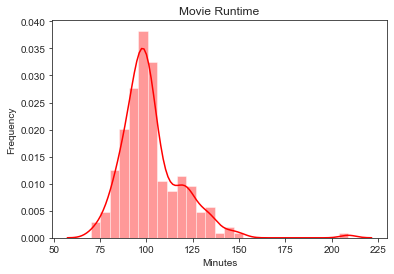

In [158]:
# Plot runtime using runtimeplot function
sns.distplot(netflixdf['runtime_minutes'], color = 'Red')
plt.title('Movie Runtime')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

Unlike the top 100 grossing movies post 2010 which had a median of 120 minutes, Netflix original movies appear to be shorter, with a median of 99 minutes. This can be explained by cinema-goers treating it as an experience and happy to see a longer film as part of an outing, and also action/adventure sequences appearing more visually enticing on a larger screen. 

Let us investigate the most popular genres for Netflix original movies.

In [159]:
# Investigate genres 
netflixdf['genre'].values[:10]

array(['War/drama', 'Western', 'Action', 'Adventure', 'Satire',
       'Action comedy', 'Comedy-drama', 'Comedy', 'Thriller',
       'Comedy-drama'], dtype=object)

The genres appear to have been categorised 'messily' with multiple genres seperated differently. As we are after a quick snapshot, we will transform the array into a string and eliminate some of the special characters/ punctuation. We will then create a Word Cloud to visualise the most common genres.

In [160]:
# Extract text and remove special characters
netflixgenretext = str(netflixdf['genre'].values).replace("'","").replace("-", " ").replace("\n", " ")
netflixgenretext[:100]

'[War/drama Western Action Adventure Satire Action comedy  Comedy drama Comedy Thriller Comedy drama '

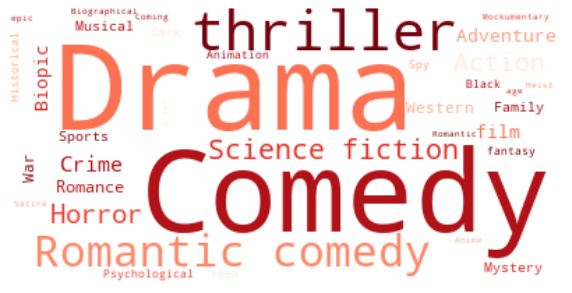

In [161]:
# Create wordcloud with red font color and white background
wordcloud = WordCloud(colormap="Reds", background_color="white").generate(netflixgenretext)

# Set size
plt.figure(figsize = (10,10))

#plot using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')

# Remove axis as not required
plt.axis("off")
plt.show()

As we can see **drama** and **comedy** dominate, followed by **thriller**. **Science fiction** and **romantic comedy** (which can be seen as a subset of comedy) are also well represented.

**Summary of Findings and Recommendations**

The number of Netflix original movies grew rapidly between 2015 and 2018 and stabilised in 2019 at around **70 movies per annum**.
The runtime is on average **99 minutes**, shorter than top grossing movies at the box office (around 120 minutes)
The most popular genres are **comedy**, **drama** and **thriller** in contrast to the action/adventure movies we saw from the box office data. This indicates that different genre movies may be better suited to different platforms. In particular action/adventure movies benefit from the large screen.

## Case study: Movies based on Video Games

In this section, we will explore movies based on video games, on the basis that the Company may wish to use one of its existing gaming franchises as source material for its movie.

Let us recall our `videogamemoviesdf` DataFrame from section 2.3

In [176]:
videogamemoviesdf.head()

,movie,release_date,worldwide_gross,Distributor,Original game publisher,release_year
0,Super Mario Bros.,1993-05-28,20915465,Buena Vista Pictures Distribution,Nintendo,1993
1,Double Dragon,1994-11-04,2341309,Gramercy Pictures,Technōs Japan,1994
2,Street Fighter,1994-12-23,99423521,Universal Pictures,Capcom,1994
3,Mortal Kombat,1995-08-18,122195920,New Line Cinema,WB Games,1995
4,Mortal Kombat: Annihilation,1997-11-21,51376861,New Line Cinema,WB Games,1997


Let us begin by looking at the number of such movies released each year.

In [163]:
# Create new column release_year
videogamemoviesdf['release_year']=pd.DatetimeIndex(videogamemoviesdf['release_date']).year
videogamemoviesdf.head()

,movie,release_date,worldwide_gross,Rotten Tomatoes,Metacritic,Distributor,Original game publisher,release_year
0,Super Mario Bros.,1993-05-28,20915465,21%[3],NaN,Buena Vista Pictures Distribution,Nintendo,1993
1,Double Dragon,1994-11-04,2341309,8%[5],NaN,Gramercy Pictures,Technōs Japan,1994
2,Street Fighter,1994-12-23,99423521,11%[7],NaN,Universal Pictures,Capcom,1994
3,Mortal Kombat,1995-08-18,122195920,46%[9],58/100[10],New Line Cinema,WB Games,1995
4,Mortal Kombat: Annihilation,1997-11-21,51376861,2%[12],11/100[13],New Line Cinema,WB Games,1997


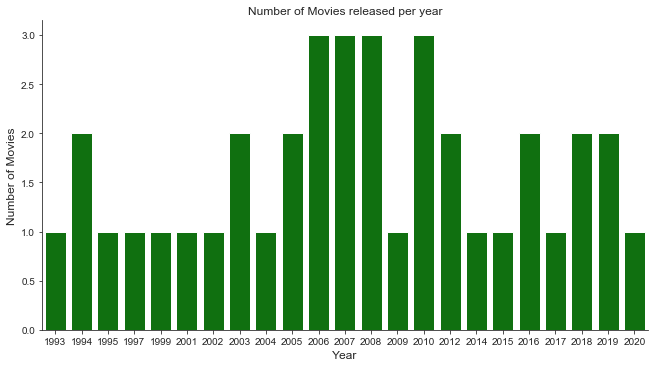

In [164]:
# Plot number of movies released per year
sns.catplot(x = 'release_year', kind = 'count', aspect = 1.8, color = 'Green', data = videogamemoviesdf)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Movies released per year', fontsize = 12)
plt.show()

From the visualsiation, we can see that between 1 and 3 movies each year are based on video games. There do not appear to be any trends/patterns.

In [165]:
# Get summary statistics for worldwide_gross
videogamemoviesdf['worldwide_gross'].describe().apply(lambda x: format(x, 'f'))

count           38.000000
mean     135163689.684211
std      136938820.093040
min          92321.000000
25%       12847629.500000
50%       98515487.000000
75%      240420071.750000
max      439048914.000000
Name: worldwide_gross, dtype: object

Based on the 38 movies in our dataset, the average worldwide gross for a movie based on a video game is **\$135 million**.

In [166]:
# Get median for all movies and toprecentmovies
display(movies['worldwide_gross'].median())
toprecentmovies['worldwide_gross'].median()

40585745.5

778774036.5

In comparison the average worldwide gross for all movies in our dataset was \\$40 million and the average worldwide gross for the top 100 grossing movies was \\$778 million.

In [167]:
videogamemoviesdf.head()

,movie,release_date,worldwide_gross,Rotten Tomatoes,Metacritic,Distributor,Original game publisher,release_year
0,Super Mario Bros.,1993-05-28,20915465,21%[3],NaN,Buena Vista Pictures Distribution,Nintendo,1993
1,Double Dragon,1994-11-04,2341309,8%[5],NaN,Gramercy Pictures,Technōs Japan,1994
2,Street Fighter,1994-12-23,99423521,11%[7],NaN,Universal Pictures,Capcom,1994
3,Mortal Kombat,1995-08-18,122195920,46%[9],58/100[10],New Line Cinema,WB Games,1995
4,Mortal Kombat: Annihilation,1997-11-21,51376861,2%[12],11/100[13],New Line Cinema,WB Games,1997


To investigate production budget, let us merge our `videogamemoviesdf` DataFrame with the `tnmb` DataFrame.

In [168]:
# Merge with tnmb DataFrame 
tnmbvg = pd.merge(tnmb, videogamemoviesdf, on = ['movie'])

# View relevant columns
tnmbvg[['movie', 'production_budget', 'worldwide_gross_x', 'worldwide_gross_y']].head()

,movie,production_budget,worldwide_gross_x,worldwide_gross_y
0,Rampage,120000000,428056280,428028233
1,Tomb Raider,90000000,273477501,274650803
2,Resident Evil: The Final Chapter,40000000,314101190,312257250
3,Warcraft,160000000,425522281,439048914
4,Hitman: Agent 47,35000000,82182803,82347656


Note that we have two columns with worldwide gross, as this data was found in both DataFrames. At a quick glance the figures appear very similar, which strengtens their reliability.

In [169]:
# Get statistics on production_budget
tnmbvg['production_budget'].describe().apply(lambda x: format(x, 'f'))

count           27.000000
mean      51314814.814815
std       33262114.088227
min        7000000.000000
25%       30000000.000000
50%       42000000.000000
75%       62500000.000000
max      160000000.000000
Name: production_budget, dtype: object

In our combined DataFrame we were able to join 27 of the 38 movies based on video games, so whilst we lost some data it is still worthwhile looking at budget.

The budget for movies based on video games is on average **\$ 50 million**.

To investigate runtime and genre, let us merge our `videogamesdf` DataFrame with the `imdb` DataFrame.

In [170]:
# Merge with imdb DataFrame to get budget info
imdbvg = pd.merge(imdb, videogamemoviesdf, on = ['movie'])

# View relevant columns
imdbvg[['movie', 'runtime_minutes', 'genres']].head()

,movie,runtime_minutes,genres
0,Mortal Kombat,87.0,"Action,Adventure,Fantasy"
1,Sonic the Hedgehog,87.0,"Action,Adventure,Family"
2,Postal,77.0,Comedy
3,Rampage,107.0,"Action,Adventure,Sci-Fi"
4,Tomb Raider,119.0,"Action,Adventure,Fantasy"


In [171]:
# Describe runtime
imdbvg['runtime_minutes'].describe()

count     17.000000
mean     104.529412
std       18.628331
min       77.000000
25%       91.000000
50%       96.000000
75%      116.000000
max      147.000000
Name: runtime_minutes, dtype: float64

Note that we are now only looking at 17 movies, which is less than half of the identified movies based on video games.

We note that the movies appear shorter than average with a median of **96 minutes**.

In [172]:
# Obtain value counts for genre column
imdbvg['genres'].value_counts()

Action,Adventure,Fantasy    4
Action,Horror,Sci-Fi        3
Action,Adventure,Sci-Fi     2
Action,Crime,Drama          1
Action,Adventure,Crime      1
Action,Crime,Thriller       1
Action,Adventure,Family     1
Comedy                      1
Action,Adventure,Horror     1
Action                      1
Horror                      1
Name: genres, dtype: int64

We see that the broad **action/adventure** genre dominates, with only one **comedy** movie.

A movie based on an existing video game could serve as the Company's entry into the movie industry, benefiting from an existing fan base. We have undertaken a brief review of the Company's major video game franchises to identify a couple of potential options.

**Halo**

Halo is a science-fiction military video game franchise. There have been talks of creating a feature-length live action movie based on the universe and the Company offered to sell the rights to it but this did not take off. The Company retains the rights and could investigate the feasability of such project. Halo is a first-person shooter and thus would suit an **action/adventure** type movie. The franchise is hugely successful with an estimated worth of over \$4 billion.

**Forza**

Forza is a series of racing games and one of the highest grossing fanchises, estimated at over \$1 billion. It is not immediately apparent what a potential movie's plot/storyline would be but car racing does lend itself well to the big screen!

**Minecraft**

Minecraft is the single best-selling video game of all time and all round cultural phenomenon, with the franchise worth an estimated \$7 billion. A movie is currently in the works due to be released in 2022 but there is certainly scope for another film should the Company wish to produce in house.

# Conclusion and Future Work

## Summary of Findings

**Profit and Profit Margin**
- Profit can be seen as worldwide gross less production budget but note that this is a simplified approach as does not account for other revenue streams and costs. 
- We found a high correlation between profit and worldwide gross.
- Median profit for a top 100 grossing movie post 2010 is \\$600 million.
- Profit margin for a top 100 grossing movie post 2010 is around 80%.

**Budget**
- Strong negative correlation between budget and profit margin.

**Runtime**
- Average runtime is 100 minutes.
- Top movies are longer, around 120 minutes.
- No direct correlation between runtime and worldwide gross, nor runtime and production budget

**Genre**
- Over half of movies produced can be described as drama.
- More than 80% of the top 100 grossing movies post 2010 can be described as adventure movies and 60% fall into action.
- An action and/or adventure movies costs on average \\$45 million more.
- Action movies rose to popularity in 2010 and have been outperforming non-action movies since. Adventure movies have consistantly outperformed non-adventure movies since 2009.
- Future movies for which data are already available are mostly drama and comedy.

**Release date**
- Most successful months are May/June and November.
- Most movies are released on a Friday.

**Netflix Original Movies**
- Characteristics differ for an online distribution model.
- Around 70 movies released per annum (based on 2018 and 2019).
- Runtime of around 99 minutes.
- Comedy and drama dominate.

**Movies based on video games**
- Between 1 and 3 such movies released each year.
- Average worldwide gross of \$135 million.
- Average budget of \$50 million.
- Action and Aventure dominate.
- Company's existing franchises to leverage: Halo, Forza and Minecraft.

## Actionable Insights


1. Have a **budget** of at least \\$50 million and ideally \\$150-200 million.
2. Produce a long movie, with a **runtime of at least 2 hours**.
3. Produce an **action/adventure** type of movie.
4. Aim for a release date in **May/June** or **November**
5. Decide whether to pursue Box Office or online distribution as characteristics differ
6. Consider utilising existing video games franchises to benefit from existing fanbase

## Future Work

As next steps, we would suggest the following:
- A reconciliation of the financial data, reviewing other reported sources to strengthen the reliability of the data
- Further financial analysis e.g. how to allocate the production budget
- Analysis of additional revenue streamse e.g. merchandise
- Sentiment analysis of reviews
- Analysis of screenplay source e.g. based on book or original
- Analysis of certification ratings